# CE QUE NOUS POUVONS ATTENDRE

1. * Quelle est la différence entre le « prix » et le « prix de détail » et quel est l'effet de la différence. S'attendre à un plus grand nombre d'unités vendues si le prix est inférieur au prix de détail et vice versa.
1. * Le fait d'avoir des boosts publicitaires augmente-t-il le succès ?
1. * Existe-t-il une corrélation entre les unités vendues et les notes ?
1. * Qu'est-ce que les badges ? Cela ressemble à des "récompenses" en quelque sorte ? Le succes augmente avec le nombre de badges ?
1. * Quels sont les effets des différents types de badges ?
1. * Peut-être une brève analyse des variations size de produits. Des variations accrues entraînent-elles un succès accru ?
1. * Analyse des options d'expédition
1. * Analyse du total des stocks et des unités vendues.

In [793]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import math

from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")


In [794]:
df = pd.read_csv(r'wish_data_cleaned.csv')
df.head()

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,num_listings,tag_list
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,...,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,1,"['Summer', 'Fashion', 'womenunderwearsuit', 'p..."
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,...,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,6,"['Mini', 'womens dresses', 'Summer', 'Patchwor..."
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,...,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,2,"['Summer', 'cardigan', 'women beachwear', 'chi..."
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,...,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,4,"['Summer', 'Shorts', 'Cotton', 'Cotton T Shirt..."
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,...,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,3,"['Summer', 'Plus Size', 'Lace', 'Casual pants'..."


In [795]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

import pandas_profiling as pp
profile = pp.ProfileReport(df)

profile.to_file(output_file="wish_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [796]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating', 'merchant_id',
       'merchant_has_profile_picture', 'product_url', 'product_picture',
       'product_id', 'num_listings', 'tag_list'],
      dtype='object')

In [797]:
df.duplicated().sum()

0

In [798]:
df.shape

(1539, 39)

In [799]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1539 non-null   object 
 1   title_orig                    1539 non-null   object 
 2   price                         1539 non-null   float64
 3   retail_price                  1539 non-null   int64  
 4   units_sold                    1539 non-null   int64  
 5   uses_ad_boosts                1539 non-null   int64  
 6   rating                        1539 non-null   float64
 7   rating_count                  1539 non-null   int64  
 8   rating_five_count             1539 non-null   float64
 9   rating_four_count             1539 non-null   float64
 10  rating_three_count            1539 non-null   float64
 11  rating_two_count              1539 non-null   float64
 12  rating_one_count              1539 non-null   float64
 13  bad

In [800]:
df['tag_list'].value_counts()

['Summer', 'Fashion', 'Necks', 'Skirts', 'Dress', 'Loose', "Women's Fashion", 'Round neck', 'beach dress', 'sleeveless', 'Beach', 'Casual', 'Women']                                                                                                                                                                                   15
['Summer', 'Sling', 'Dresses', 'Dress', 'V-neck', 'Casual', 'Pocket', "Women's Fashion", 'Sleeveless dress', 'women dress', 'Floral', 'sleeveless', 'Women', 'loose dress', 'Pleated', 'casual dress']                                                                                                                                  9
['slimming', 'wasitcincher', 'Fashion', 'waistgirdle', 'slimmingcorset', 'Corset', 'Summer', 'Waist', 'waist trainer', 'Fashion Accessory', 'Vest', 'shaperwear', 'belt']                                                                                                                                                               8
['Summer',

In [801]:
df.corr()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,num_listings
price,1.000000,0.305059,-0.029633,-0.077337,0.057234,-0.006073,-0.004790,-0.002425,-0.002425,-0.013271,...,0.272531,0.872815,0.147772,-0.032006,-0.169302,-0.024016,-0.024114,0.045666,0.017536,-0.164080
retail_price,0.305059,1.000000,0.012926,-0.034889,0.027360,0.054632,0.053128,0.061340,0.061340,0.045987,...,0.122293,0.262055,-0.010222,0.039849,-0.003013,-0.011346,0.031054,0.058420,0.032088,-0.137096
units_sold,-0.029633,0.012926,1.000000,-0.020194,0.038371,0.899084,0.876488,0.891348,0.891348,0.867037,...,0.130511,-0.036369,-0.008778,-0.013824,0.006245,-0.028266,0.272282,0.119660,0.141372,0.015398
uses_ad_boosts,-0.077337,-0.034889,-0.020194,1.000000,-0.046994,-0.047968,-0.047391,-0.047721,-0.047721,-0.047441,...,-0.138270,-0.065574,-0.019147,-0.015790,0.043264,0.011260,0.029235,-0.029324,0.003340,0.084217
rating,0.057234,0.027360,0.038371,-0.046994,1.000000,0.053623,0.097563,0.062308,0.062308,-0.025647,...,0.040682,0.072020,0.024563,0.047208,-0.054188,-0.039361,0.033652,0.244574,0.010023,-0.054173
rating_count,-0.006073,0.054632,0.899084,-0.047968,0.053623,1.000000,0.983371,0.995933,0.995933,0.946250,...,0.131005,-0.010887,-0.001591,-0.001803,0.008717,-0.008576,0.257581,0.138841,0.153384,-0.011962
rating_five_count,-0.004790,0.053128,0.876488,-0.047391,0.097563,0.983371,1.000000,0.981241,0.981241,0.873951,...,0.123724,-0.005831,0.005738,-0.001282,0.000372,-0.013125,0.246575,0.160711,0.154750,-0.017236
rating_four_count,-0.002425,0.061340,0.891348,-0.047721,0.062308,0.995933,0.981241,1.000000,1.000000,0.933323,...,0.131895,-0.008817,-0.004880,-0.000774,0.013784,-0.009425,0.251776,0.140758,0.151503,-0.015952
rating_three_count,-0.002425,0.061340,0.891348,-0.047721,0.062308,0.995933,0.981241,1.000000,1.000000,0.933323,...,0.131895,-0.008817,-0.004880,-0.000774,0.013784,-0.009425,0.251776,0.140758,0.151503,-0.015952
rating_two_count,-0.013271,0.045987,0.867037,-0.047441,-0.025647,0.946250,0.873951,0.933323,0.933323,1.000000,...,0.130957,-0.022941,-0.011125,-0.002165,0.018444,0.001482,0.259794,0.090455,0.135943,0.000489


In [802]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,1539,1201,Nouvelle mode d'été femmes robe décontractée c...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title_orig,1539,1203,New Fashion Summer Women Casual Dress Round Ne...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1539.0,NaN,NaN,NaN,8.356452,3.937161,1.0,5.825,8.0,11.0,49.0
retail_price,1539.0,NaN,NaN,NaN,23.317089,30.309642,1.0,7.0,10.0,26.0,252.0
units_sold,1539.0,NaN,NaN,NaN,4422.480182,9438.316389,1.0,100.0,1000.0,5000.0,100000.0
uses_ad_boosts,1539.0,NaN,NaN,NaN,0.435997,0.496048,0.0,0.0,0.0,1.0,1.0
rating,1539.0,NaN,NaN,NaN,3.82284,0.508619,1.0,3.55,3.85,4.11,5.0
rating_count,1539.0,NaN,NaN,NaN,907.37232,2001.720315,0.0,26.0,161.0,873.0,20744.0
rating_five_count,1539.0,NaN,NaN,NaN,438.144899,977.595368,0.0,11.0,77.0,401.0,11548.0
rating_four_count,1539.0,NaN,NaN,NaN,177.922027,399.443707,0.0,4.5,30.0,167.0,4152.0


In [803]:
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(df)

title :  1201
title_orig :  1203
price :  127
retail_price :  104
units_sold :  15
uses_ad_boosts :  2
rating :  192
rating_count :  761
rating_five_count :  605
rating_four_count :  440
rating_three_count :  440
rating_two_count :  262
rating_one_count :  330
badges_count :  4
badge_local_product :  2
badge_product_quality :  2
badge_fast_shipping :  2
tags :  1230
product_color :  102
product_variation_size_id :  107
product_variation_inventory :  48
shipping_option_price :  8
shipping_is_express :  2
countries_shipped_to :  94
inventory_total :  10
has_urgency_banner :  2
origin_country :  7
merchant_title :  958
merchant_name :  958
merchant_info_subtitle :  1059
merchant_rating_count :  917
merchant_rating :  952
merchant_id :  958
merchant_has_profile_picture :  2
product_url :  1341
product_picture :  1341
product_id :  1341
num_listings :  10
tag_list :  1230


In [804]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<h2> Feature Engineering</h2>

Pour extraire plus d'informations à partir des données nous ferons une analyse exploratoire sur chaque colonne

In [805]:
# les colones categorielles

cat_cols=[x for x in df.columns if df[x].dtype=='O']
cat_cols

['title',
 'title_orig',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'product_url',
 'product_picture',
 'product_id',
 'tag_list']

In [806]:
# les colones numeriques
num_cols=[x for x in df.columns if df[x].dtype!='O']
num_cols

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture',
 'num_listings']

***<h3>1.title & title_orig</h3>***

In [807]:
df['title_orig'].value_counts()

New Fashion Summer Women Casual Dress Round Neck Loose Big Swing Skirt Sleeveless Soild Color Beach dress          22
Sexy Women's Summer Casual Sleeveless Evening Party Backless Beachwear Mini Dress                                  11
Summer Women Sling Dress V-neck Floral Pleated Strap Casual Pocket Large Dress                                      9
Summer Women s  Fashion  Lace Up Tie Pants  Plus Size Casual High Waist Short Pants                                 9
Fabric Waist Trainer Vest Hot Shaper Summer Shaperwear Slimming Adjustable Sweat Belt Body Shaper                   9
                                                                                                                   ..
Woman's Fashion Shirt short Sleeve Casual V-neck T-shirt Skirt Dress                                                1
Women Two Piece Set Print Wave Striped Sleeveless Tops+Short Skirts Excellent                                       1
Pandolah Hot Women One Piece Bathing Suit Dotted Beachwe

In [808]:
#extraire des informations sur le genre via le titre du produit

df['title_orig'] = df['title_orig'].apply(lambda x: str(x).title())

women_err = []

def prod_gen(tipe):
    for i in df['title_orig']:
        if ('Man' in i) or ('Men' in i) and (i != 'Woman') :
            women_err.append(i)
    if tipe in women_err:
        return 'Men'
    else:
        return 'Woman'
        
df.insert(1, 'prod_gen', df['title_orig'].apply(prod_gen))

df['prod_gen'].value_counts()

Woman    1452
Men        87
Name: prod_gen, dtype: int64

<h3>Q1 : Est-ce que les produits avec des titres traduits sont nettement plus vendus que les produits sans traduction?</h3>

À propos de la différence entre title et title_orig : nous pouvons supposer qu'un produit se vend mieux s'il a une traduction dans la langue préférée du client. Et si un produit est disponible et traduit dans plus de pays et de langues, le marché serait plus vaste. Cela pourrait à son tour conduire à plus de ventes.

In [809]:
title_same = df[df['title'] == df['title_orig']]
title_diff = df[df['title'] != df['title_orig']]

In [810]:
from scipy import stats
stats.ttest_ind(title_same['units_sold'], title_diff['units_sold'])

Ttest_indResult(statistic=-2.3081298201166764, pvalue=0.021124128919168858)

In [811]:
title_same['units_sold'].mean()

1331.875

In [812]:
title_diff['units_sold'].mean()

4521.976525821597

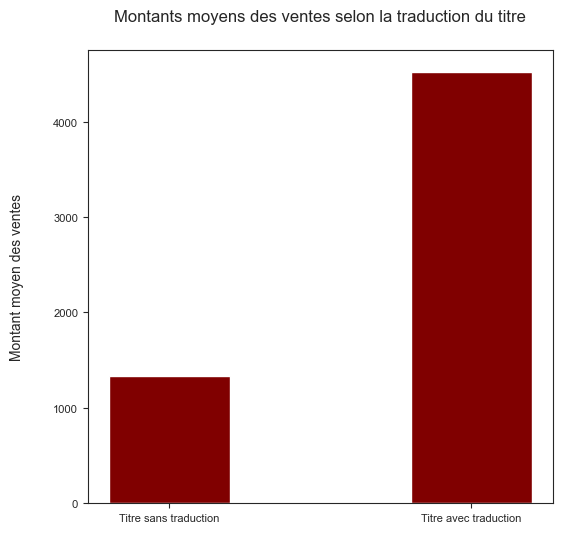

In [813]:
sns.set_style('ticks')
data = {'Titre sans traduction':1331.875, 'Titre avec traduction':4521.97}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.ylabel("Montant moyen des ventes",labelpad=21)
plt.title("Montants moyens des ventes selon la traduction du titre",pad=21)
plt.show()

Selon les résultats, les produits avec des titres traduits sont nettement plus vendus que les produits sans traduction. La barrière de la langue affecte la quantité de produits vendus. Les produits avec un titre traduit peuvent rassurer le consommateur ou les consommateurs peuvent ignorer les produits sans titre traduit.

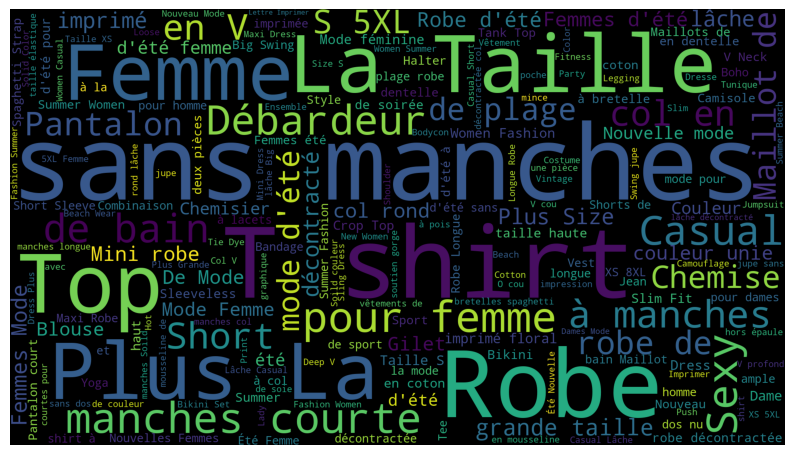

In [814]:
plt.subplots(figsize=(10,25))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()




Nous avons supprimé la colonne shipping option name, mais pour la plupart des marchands, il n'y a pas de traduction en français dans les options d'expédition. Si on analyse la colonne, nous voyons que la majorité des produits vendus ont un nom d'option d'expédition en français. Ainsi, comme dans le cas des titres, la barrière de la langue peut affecter les ventes. 

<h3>Axe d'amelioration_1 :Il serait peut-être préférable d'avoir une option de traduction pour augmenter la satisfaction de l'expérience utilisateur.</h3>

***<h3>2. Price - Retail price</h3>***

<AxesSubplot:xlabel='price', ylabel='units_sold'>

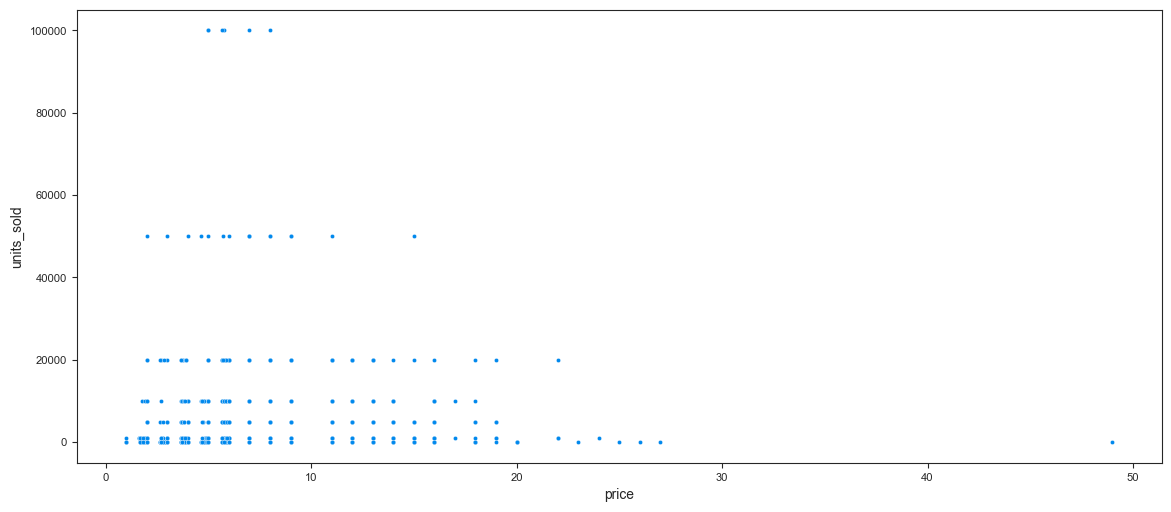

In [815]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df,x="price",y="units_sold")

## les produits entre 1 et 10 euros ont quelques produits avec 100 000 unités vendues et des produits dont le prix est compris entre 10 et 20 euros plafonnement
## à environ 50000 unités vendues
### les produits dont le prix est compris entre 20 et 30 euros plafonnent à 20 000 unités vendues tandis que les produits haut de gamme coûtent un peu moins de 50 euros
## a une unité vendue
## La plus grande variabilité des ventes se situe entre les produits à bas et moyen prix

In [816]:
prix_moyen= df['price'].mean()
prix_moyen

8.356452241715388

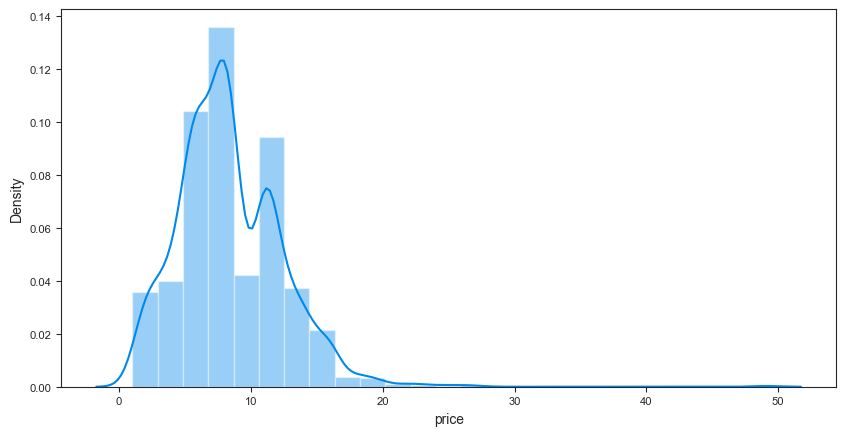

In [817]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'], bins=25)
plt.show()

Le prix moyen des vêtements d'été vendus sur le e-commerce wish est de l'ordre de 7 - 12 euros

<AxesSubplot:xlabel='retail_price'>

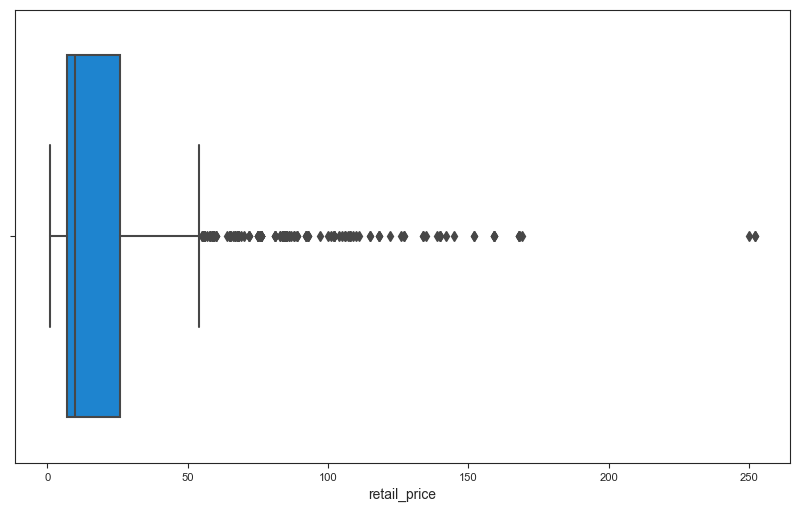

In [818]:
plt.figure(figsize=(10,6))
sns.boxplot(df["retail_price"])

<AxesSubplot:xlabel='price'>

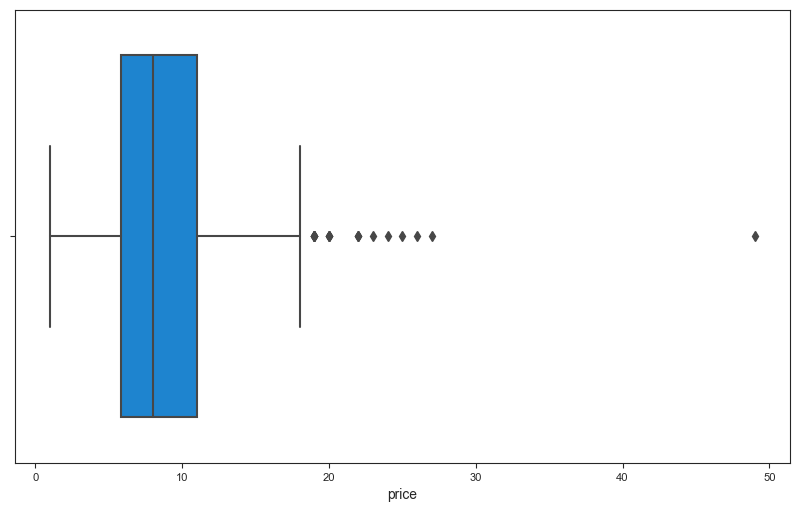

In [819]:
plt.figure(figsize=(10,6))
sns.boxplot(df["price"])

Avec Boxplots, nous pouvons facilement repérer les valeurs aberrantes et les quartiles

* La clôture supérieure du prix est à 18, c'est-à-dire que la plupart des données ont un prix inférieur à 18
* Il y a un article avec un prix de 49, c'est-à-dire clairement une valeur aberrante car il est loin de la plage interquartile (Q3 - Q1)
* La boxplot du prix de détail est beaucoup plus étalée, il y a une énorme différence de 195 entre la clôture supérieure et le point de données maximum

In [820]:
import plotly.express as px
px.scatter(df, x='units_sold', y='price',marginal_x='box', title='Price vs Units Sold')

 Prix élevé ==> moins d'unités vendues
1. Il y a des cas où le prix est bas mais les unités vendues sont inférieures à la moyenne, des raisons possibles pour lesquelles le produit pourrait ne pas être à la hauteur selon les acheteurs ou il y a d'autres facteurs affectant le prix que nous n'avons pas encore touchés
2. la médiane des unités vendues est de 1000, on peut donc considérer que les produits avec des unités vendues en dessous de 1000 (inclus) étaient en dessous de la moyenne et que les produits avec des unités vendues ont beaucoup de succès.

 Cela dépend totalement des objectifs commerciaux sur la fourchette de prix sur laquelle souhaitons se concentrer.

<h3>Q2 : Analyse sur la chiffre d'affaires et profit</h3>

In [821]:
#ajouter une colonne de revenus afin d'obtenir de meilleurs résultats d'analyse
df['revenu'] = df['price'] * df['units_sold']

In [822]:
#le produit qui rapporte le plus de revenus(chiffre d'affaires)
df.sort_values(by='revenu', ascending = False).head(10)

,title,prod_gen,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,num_listings,tag_list,revenu
214,Nouveau Aeeival Femmes Vêtements À Manches Lon...,Woman,New Aeeival Women Clothing Long Sleeve Autumn ...,8.00,7,100000,1,3.76,11062,4663.0,...,108048,4.052504,5417aada4ad3ab27e954b76c,1,https://www.wish.com/c/54bdf18039b8c045f118936a,https://contestimg.wish.com/api/webimage/54bdf...,54bdf18039b8c045f118936a,2,"['roupas femininas', 'womens dresses', 'Lace',...",800000.0
400,Femmes dentelle plage boho maxi robe d'été san...,Woman,Women Lace Beach Boho Maxi Sundress Sleeveless...,15.00,115,50000,1,3.94,6735,3278.0,...,165915,4.256077,53a2a09ad91139519161a267,0,https://www.wish.com/c/563707b0e5be09157176fe80,https://contestimg.wish.com/api/webimage/56370...,563707b0e5be09157176fe80,3,"['bathing suit', 'strapless', 'Lace', 'women d...",750000.0
1006,Femmes dentelle manches courtes hauts hauts ch...,Woman,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.00,22,100000,1,3.82,11913,5355.0,...,320031,4.218866,5357bcf2bb72c5504882e889,1,https://www.wish.com/c/567cb0925ff12c4829f07dfb,https://contestimg.wish.com/api/webimage/567cb...,567cb0925ff12c4829f07dfb,2,"['blouse', 'Fashion', 'Shirt', 'boho', 'Tops',...",700000.0
92,Femmes Camisole extensible Spaghetti Strap Lon...,Woman,Women Stretchy Camisole Spaghetti Strap Long T...,5.77,48,100000,0,4.10,20744,11184.0,...,330405,4.067348,53f2beb39020ee03566d6e18,1,https://www.wish.com/c/544b079d1280fa28eee9b380,https://contestimg.wish.com/api/webimage/544b0...,544b079d1280fa28eee9b380,1,"['Mini', 'Strapless Dress', 'Spaghetti Strap',...",577000.0
1152,Nouvelle arrivée femmes été sexy robe de soiré...,Woman,Women'S Summer Sexy Sleeveless Turtleneck Mini...,5.67,19,100000,0,3.53,18393,6769.0,...,19248,3.889131,570f3a713a698c14278bb51e,0,https://www.wish.com/c/571adeab62cce546f1a46bc0,https://contestimg.wish.com/api/webimage/571ad...,571adeab62cce546f1a46bc0,1,"['slim dress', 'Mini', 'Elegant', 'Dress', 'Mi...",567000.0
1016,Maillots de bain à rayures pour dames avec dou...,Woman,Women'S Striped Double Up Tankini Top,11.00,10,50000,0,3.91,13488,6325.0,...,17816,4.179445,56e43d9e3a698c3826a5feff,1,https://www.wish.com/c/574ff29cb4b28660d9f94d3f,https://contestimg.wish.com/api/webimage/574ff...,574ff29cb4b28660d9f94d3f,3,"['strapless', 'Fashion', 'Tops', 'striped biki...",550000.0
251,T-shirt à manches courtes en mousseline de soi...,Woman,Womens Summer Red White And Blue Chiffon Short...,5.00,33,100000,0,3.98,13789,6862.0,...,366898,4.036081,53082ea15aefb07dfe1f2a4f,0,https://www.wish.com/c/53897eeeafddf70c91af1cda,https://contestimg.wish.com/api/webimage/53897...,53897eeeafddf70c91af1cda,1,"['Summer', 'Plus Size', 'Cotton T Shirt', 'chi...",500000.0
17,2018 New Fashion Women's Tops Sexy Strappy Sle...,Woman,2018 New Fashion Women'S Tops Sexy Strappy Sle...,5.00,25,100000,1,3.83,17980,8290.0,...,139223,3.933581,5708773c3c02161b3f8c7900,0,https://www.wish.com/c/5b07a7c6e997b33c6f9947da,https://contestimg.wish.com/api/webimage/5b07a...,5b07a7c6e997b33c6f9947da,5,"['blouse', 'Plus Size', 'Lace', 'lace top', 'T...",500000.0
40,Sexy Women Casual T-shirt rayé Long Tops Chemi...,Woman,Sexy Women Casual Striped T-Shirt Long Tops Bl...,9.00,81,50000,0,4.26,5359,3111.0,...,59198,4.105054,54bcaabb39b8c00b482a115f,0,https://www.wish.com/c/556fbe8595528719e004fa27,https://contestimg.wish.com/api/webimage/556fb...,556fbe8595528719e004fa27,1,"['blouse', 'Mini', 'Fashion', 'longtop', 'Shir...",450000.0
943,Hot Dernières Sexy Bikini Sexy Bikini Femmes M...,Woman,Hot Latest Sexy Bikini Women Fashion Swimming ...,9.00,8,50000,0,3.83,13198,6060.0,...,37076,4.302082,57e5db02e7f40f131adeeaf8,1,https://www.wish.com/c/5892e3b0da200f71bcec426e,https://contestimg.wish.com/api/webimage/5892e...,5892e3b0da200f71bcec426e,1,"['gatherbracketbikini', 'Panties', 'bea

In [823]:
# le profit
df_profit = df[df['revenu'] > 0].sort_values('revenu', ascending = False)
df_profit

,title,prod_gen,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,num_listings,tag_list,revenu
214,Nouveau Aeeival Femmes Vêtements À Manches Lon...,Woman,New Aeeival Women Clothing Long Sleeve Autumn ...,8.00,7,100000,1,3.76,11062,4663.0,...,108048,4.052504,5417aada4ad3ab27e954b76c,1,https://www.wish.com/c/54bdf18039b8c045f118936a,https://contestimg.wish.com/api/webimage/54bdf...,54bdf18039b8c045f118936a,2,"['roupas femininas', 'womens dresses', 'Lace',...",800000.00
400,Femmes dentelle plage boho maxi robe d'été san...,Woman,Women Lace Beach Boho Maxi Sundress Sleeveless...,15.00,115,50000,1,3.94,6735,3278.0,...,165915,4.256077,53a2a09ad91139519161a267,0,https://www.wish.com/c/563707b0e5be09157176fe80,https://contestimg.wish.com/api/webimage/56370...,563707b0e5be09157176fe80,3,"['bathing suit', 'strapless', 'Lace', 'women d...",750000.00
1006,Femmes dentelle manches courtes hauts hauts ch...,Woman,Women Lace Short Sleeve Long Tops Blouse Shirt...,7.00,22,100000,1,3.82,11913,5355.0,...,320031,4.218866,5357bcf2bb72c5504882e889,1,https://www.wish.com/c/567cb0925ff12c4829f07dfb,https://contestimg.wish.com/api/webimage/567cb...,567cb0925ff12c4829f07dfb,2,"['blouse', 'Fashion', 'Shirt', 'boho', 'Tops',...",700000.00
92,Femmes Camisole extensible Spaghetti Strap Lon...,Woman,Women Stretchy Camisole Spaghetti Strap Long T...,5.77,48,100000,0,4.10,20744,11184.0,...,330405,4.067348,53f2beb39020ee03566d6e18,1,https://www.wish.com/c/544b079d1280fa28eee9b380,https://contestimg.wish.com/api/webimage/544b0...,544b079d1280fa28eee9b380,1,"['Mini', 'Strapless Dress', 'Spaghetti Strap',...",577000.00
1152,Nouvelle arrivée femmes été sexy robe de soiré...,Woman,Women'S Summer Sexy Sleeveless Turtleneck Mini...,5.67,19,100000,0,3.53,18393,6769.0,...,19248,3.889131,570f3a713a698c14278bb51e,0,https://www.wish.com/c/571adeab62cce546f1a46bc0,https://contestimg.wish.com/api/webimage/571ad...,571adeab62cce546f1a46bc0,1,"['slim dress', 'Mini', 'Elegant', 'Dress', 'Mi...",567000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Nouvelle mode d'été femmes robe décontractée c...,Woman,New Fashion Summer Women Casual Dress Round Ne...,2.00,2,10,0,4.80,5,4.0,...,42,3.666667,5e54d1d9e0d90e6488de48c2,0,https://www.wish.com/c/5eb0c05c8418d0155e62ab7b,https://contestimg.wish.com/api/webimage/5eb0c...,5eb0c05c8418d0155e62ab7b,2,"['Summer', 'Fashion', 'Necks', 'Skirts', 'Dres...",20.00
665,2020 Femmes Mode Col En V Couleur Unie Slim Fi...,Woman,2020 Women Fashion V-Neck Solid Color Slim Fit...,4.81,30,3,0,5.00,0,0.0,...,11378,3.990508,564d8f2f3a698c01d97fbb81,0,https://www.wish.com/c/5eb618659ac3e01e76161a4a,https://contestimg.wish.com/api/webimage/5eb61...,5eb618659ac3e01e76161a4a,1,"['Summer', 'Shorts', 'Slim Fit', 'slim', 'twop...",14.43
1457,Nouvelles femmes d'été mode couleur unie short...,Woman,New Women Summer Fashion Solid Color Shorts Ca...,14.00,14,1,0,5.00,0,0.0,...,1134,3.955908,5add589edb5f1f32114d07df,0,https://www.wish.com/c/5eccb455d4eb5d46b00be0ed,https://contestimg.wish.com/api/webimage/5eccb...,5eccb455d4eb5d46b00be0ed,1,"['Summer', 'Plus Size', 'pants', 'summer short...",14.00
347,Combinaisons décontractées sans manches en cot...,Woman,Women Summer Fashion Cotton Overalls Sleeveles...,11.00,30,1,0,5.00,0,0.0,...,1380,4.007246,5d4b8931933fb13f8a1fe232,0,https://www.wish.com/c/5ebfdd5bebac37702b0b207b,https://contestimg.wish.com/api/webimage/5ebfd...,5ebfdd5bebac37702b0b207b,1,"['Summer', 'Fashion', 'Cotton', 'Casual pants'...",11.00


In [824]:
df_profit['revenu'].describe()

count      1539.000000
mean      35855.804516
std       73247.078996
min           2.720000
25%         800.000000
50%        7000.000000
75%       40000.000000
max      800000.000000
Name: revenu, dtype: float64

cela indique que les produits sont vendus alors qu'un seul produit est vendu?

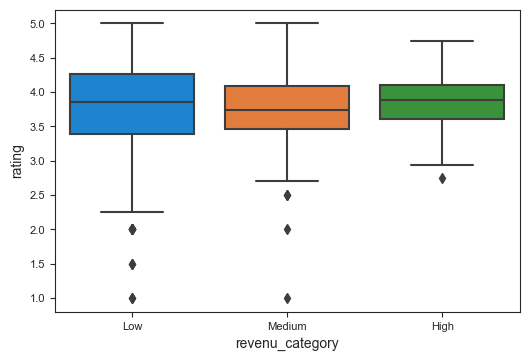

In [825]:
bins = [0,800,7000,40000]
label = ['Low', 'Medium', 'High']

df_profit['revenu_category'] = pd.cut(df_profit.revenu, bins = bins, labels = label)

sns.boxplot(data=df_profit, x='revenu_category', y='rating')
plt.show()

À partir des données sur le chiffre d'affaires :

        1. pour les ventes faibles, nous obtenons une note moyenne entre 3,5 et 4,3

        2. Pour les ventes moyennes, nous obtenons une note moyenne entre 3,5 et 4,0
        
        3. pour les ventes élevées, nous obtenons une note moyenne entre 3,5 et 4,1

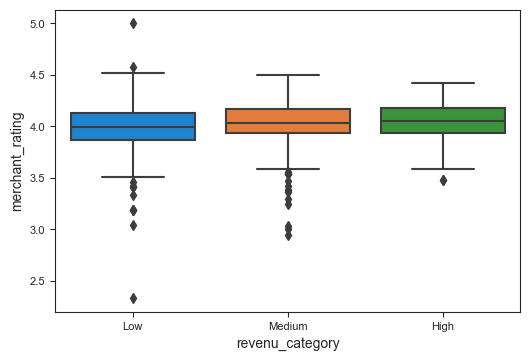

In [826]:
sns.boxplot(data=df_profit, x='revenu_category', y='merchant_rating')
plt.show()

marchand_rating a une valeur moyenne de 3,9 à 4,1

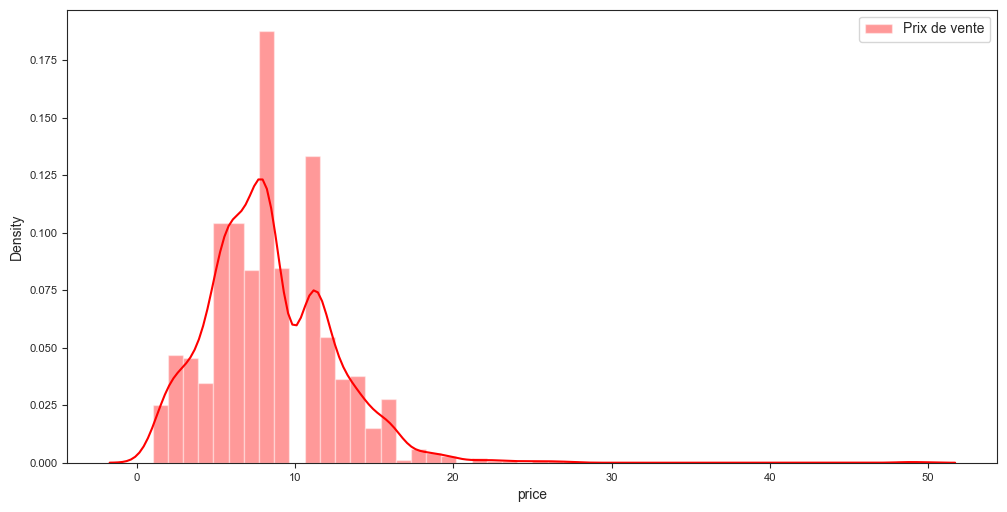

In [827]:
sns.set_style('ticks')
plt.figure(figsize=(12,6))
sns.distplot(df['price'], color='red', label='Prix de vente')

plt.legend()

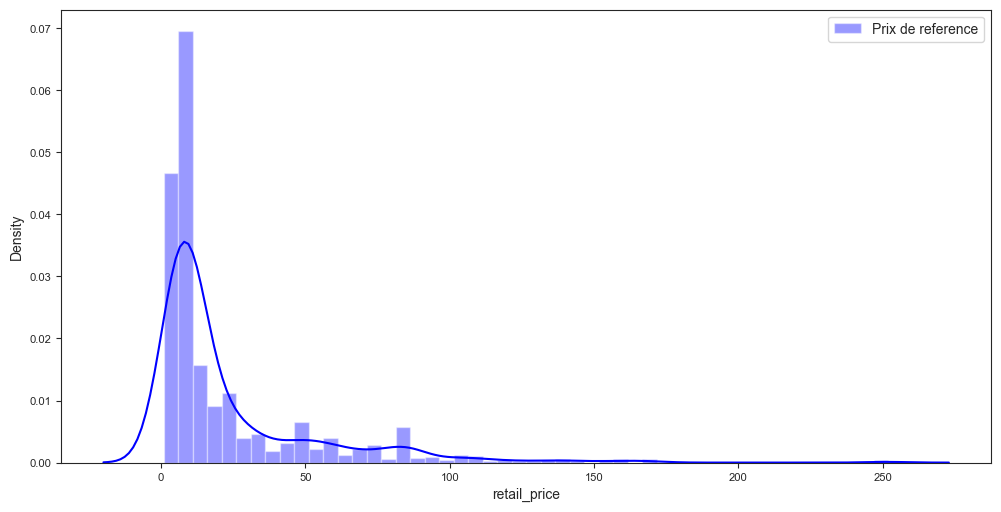

In [828]:
plt.figure(figsize=(12,6))
sns.distplot(df['retail_price'], color='blue', label='Prix de reference')
plt.legend()

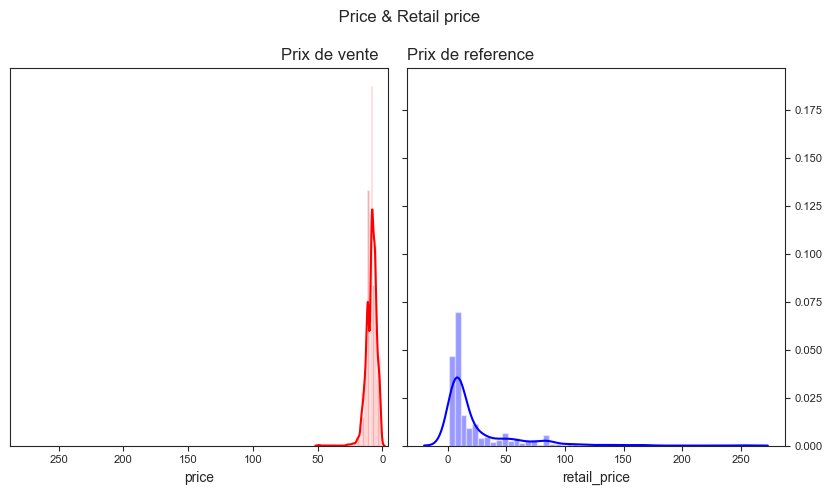

In [829]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), sharey=True, gridspec_kw={'wspace': 0.05})

  
sns.set_style('ticks')
sns.distplot(df['retail_price'], color='blue',ax=ax2)
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', labelright=True, right=True)
ax2.set_title('Prix de reference'+'  ', loc='left')


sns.distplot(df['price'], color='red',ax=ax1)

xmax = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
ax1.set_xlim(xmax=xmax)
ax2.set_xlim(xmax=xmax)

ax1.invert_xaxis()  # reverse the direction
ax1.tick_params(labelleft=False, left=False)
ax1.set_ylabel('')
ax1.set_title('Prix de vente'+'  ', loc='right')


plt.tight_layout()
plt.title(' Price & Retail price', x=0, y=1.1)
plt.show()


Text(0.5, 0, 'Discount')

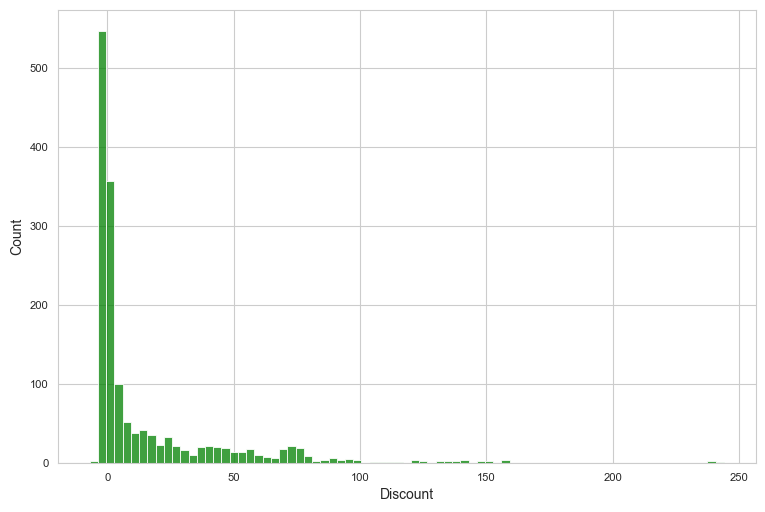

In [830]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,6))
sns.histplot(df['retail_price'] - df['price'], color='green')
plt.xlabel('Discount')

In [831]:
df['discount']=df['retail_price'] - df['price']
#Les valeurs négatives sont le balisage

In [832]:
discount = df['discount'].value_counts()

discount[discount < 0]

Series([], Name: discount, dtype: int64)

In [833]:
df['discount_percent'] = (df['discount'] / df['price']) * 100
df['discount_percent'] = df['discount_percent'].clip(lower=0)

<h3>Q3 : Analyse sur discount. Pourquoi les vendeurs ont augmenter les prix?</h3>

In [834]:
price_higher = df[(df['retail_price'] - df['price']) < 0]
len(price_higher)


548

In [835]:
price_lower = df[(df['retail_price'] - df['price']) >= 0]
len(price_lower)

991

Certains prix de vente au détail sont supérieurs au prix de reference : pendant la pandémie de COVID, de nombreux vendeurs du monde entier ont décidé d'augmenter leurs prix en raison de la pénurie d'approvisionnement. Étant donné que l'ensemble de données a été récupéré en août 2020 (avec toutes les inquiétudes liées au COVID), peut-être que certains vendeurs soient passés d'un prix régulier précédent A à un prix spécial covid B supérieur au prix A.

In [836]:
stats.ttest_ind(price_higher['units_sold'], price_lower['units_sold'])

Ttest_indResult(statistic=1.250348117461381, pvalue=0.21136273134804373)

In [837]:
print(price_higher['units_sold'].mean(), price_lower['units_sold'].mean())

4826.93795620438 4198.824419778002


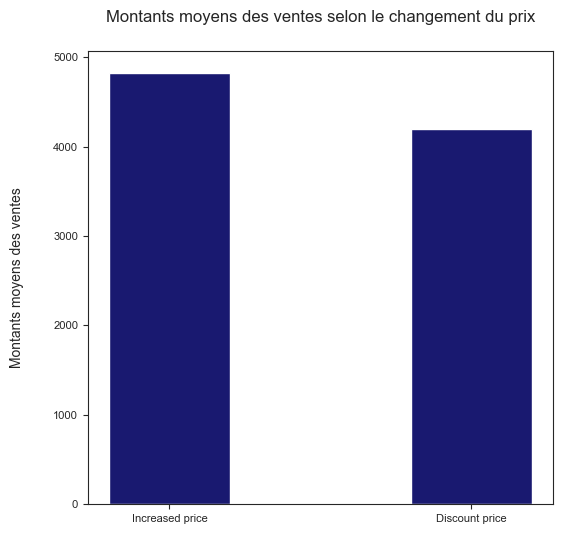

In [838]:
sns.set_style('ticks')
data = {'Increased price':4826.93, 'Discount price':4198.82}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(courses, values, color ='midnightblue',
        width = 0.4)
 
plt.ylabel("Montants moyens des ventes",labelpad=21)
plt.title("Montants moyens des ventes selon le changement du prix", pad=21)
plt.show()

J'ai supposé que les produits qui sont plus élevés qu'avant auraient pu se vendre moins que les produits à prix réduit. Cependant, les résultats indiquent qu'il n'y a pas de différence particulière entre ces deux groupes. C'est peut-être parce que les produits dont les prix augmentent sont essentiels pour une personne et que l'augmentation des prix n'a pas d'incidence sur ses taux de vente. En outre, les commerçants peuvent spécifiquement augmenter les prix des produits plus essentiels, sachant que les consommateurs achèteront de toute façon.

***<h3>3.units_solds</h3>***

In [839]:
df["units_sold"].unique()

array([   100,  20000,   5000,     10,  50000,   1000,  10000, 100000,
           50,      1,      7,      2,      3,      8,      6],
      dtype=int64)

In [840]:
df["units_sold"].describe()

count      1539.000000
mean       4422.480182
std        9438.316389
min           1.000000
25%         100.000000
50%        1000.000000
75%        5000.000000
max      100000.000000
Name: units_sold, dtype: float64

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

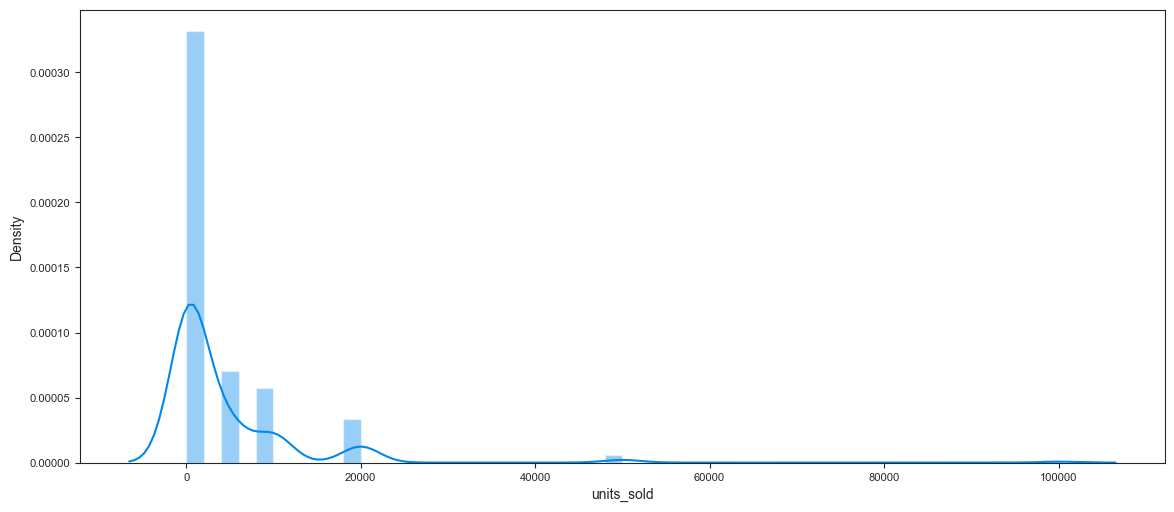

In [841]:
plt.figure(figsize=(14,6))
sns.distplot(df['units_sold'].astype('O'))

<AxesSubplot:xlabel='units_sold', ylabel='count'>

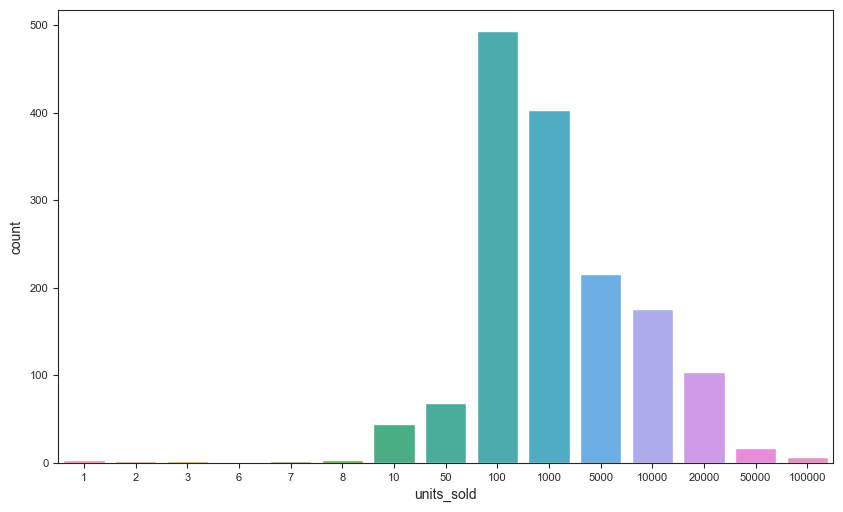

In [842]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="units_sold")

<h3>Q4: Qui entraîne une différence statistiquement significative dans les unités vendues</h3>

*uses_ad_boosts*

In [843]:
pd.crosstab(df['units_sold'],df['uses_ad_boosts'])

uses_ad_boosts,0,1
units_sold,,
1,3,0
2,2,0
3,2,0
6,1,0
7,2,0
8,3,0
10,32,12
50,43,25
100,256,237


In [844]:
df['uses_ad_boosts'].unique()

array([0, 1], dtype=int64)

In [845]:
df_use_boost=df[df['uses_ad_boosts']== 1]
df_not_use_boost=df[df['uses_ad_boosts']== 0]

Test T pour tester si l'utilisation d'un boost publicitaire, c'est-à-dire la publicité, entraîne une différence statistiquement significative dans les unités vendues
- H0 :Unités moyennes vendues pour les produits avec boosts publicitaires - Unités moyennes vendues pour les produits sans boosts publicitaires == 0
- HA :Unités moyennes vendues pour les produits avec boosts publicitaires - Unités moyennes vendues pour les produits sans boosts publicitaires !=0
- Différence dans le nombre moyen d'unités vendues pour les populations utilisant des boosts publicitaires et n'utilisant pas de boosts publicitaires
- Une valeur de p très élevée suggère que nous ne pouvons pas rejeter l'hypothèse nulle, c'est-à-dire des différences nulles dans
- nombre moyen d'unités_vendues par présence et absence de boosters publicitaires

In [846]:
stats.ttest_ind(df_use_boost['units_sold'], df_not_use_boost['units_sold'])

Ttest_indResult(statistic=-0.7918771666716706, pvalue=0.4285544944650025)

<AxesSubplot:xlabel='uses_ad_boosts', ylabel='units_sold'>

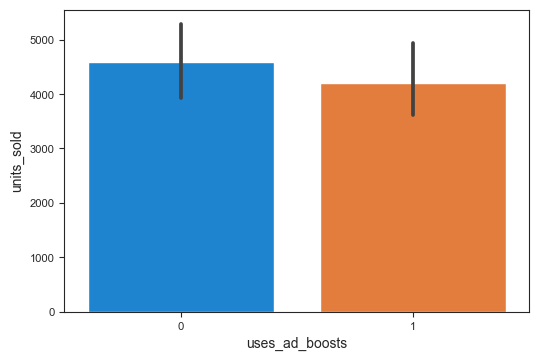

In [847]:
sns.barplot(x='uses_ad_boosts', y='units_sold', data=df)

*badge_local_product*

In [848]:
df['badge_local_product'].astype('O').value_counts()

0    1510
1      29
Name: badge_local_product, dtype: int64

In [849]:
local_vec=df['badge_local_product'].astype('O')

<AxesSubplot:xlabel='badge_local_product', ylabel='units_sold'>

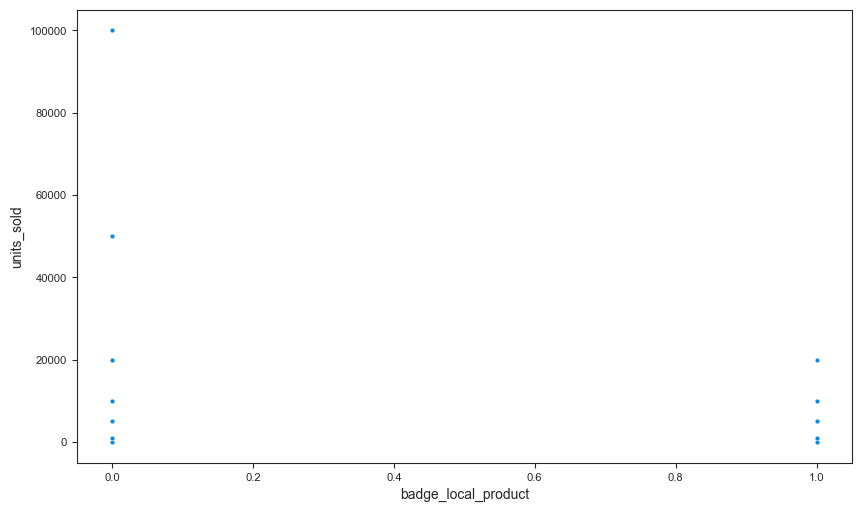

In [850]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=local_vec,y=df["units_sold"])

In [851]:
df_local_product_badge=df[df['badge_local_product']== 1]
df_no_local_product_badge=df[df['badge_local_product']== 0]

stats.ttest_ind(df_local_product_badge['units_sold'],df_no_local_product_badge['units_sold'])
## H0 :Unités moyennes vendues pour les produits avec badge local - Unités moyennes vendues pour les produits sans badge local == 0
##HA:Unités moyennes vendues pour les produits avec badge local - Unités moyennes vendues pour les produits sans badge local != 0
## p valeur supérieure à 0,05, nous ne pouvons pas rejeter l'hypothèse nulle, il n'y a donc pas d'effet statistiquement significatif de la
## présence du badge produit local sur les unités vendues

Ttest_indResult(statistic=-0.3445565518206548, pvalue=0.7304749120756033)

In [852]:
print(df_local_product_badge['units_sold'].mean(), df_no_local_product_badge['units_sold'].mean())

3824.137931034483 4433.971523178808


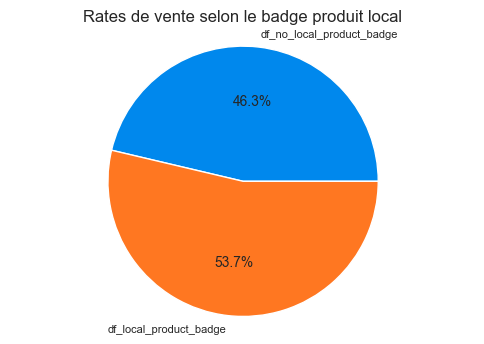

In [853]:
plot_data = [df_local_product_badge['units_sold'].mean(), df_no_local_product_badge['units_sold'].mean()]
plot_labels = 'df_no_local_product_badge','df_local_product_badge'
plt.pie(plot_data,labels=plot_labels,autopct='%1.1f%%')
plt.title('Rates de vente selon le badge produit local')
plt.axis('equal')
plt.show()

*badge_product_quality*

In [854]:
df['badge_product_quality'].astype('O').value_counts()

0    1425
1     114
Name: badge_product_quality, dtype: int64

In [855]:
df_has_quality_badge=df[df['badge_product_quality']== 1]
df_no_quality_badge=df[df['badge_product_quality']== 0]

In [856]:
stats.ttest_ind(df_has_quality_badge['units_sold'],df_no_quality_badge['units_sold'])

## H0 : Unités moyennes vendues pour les produits avec badge de qualité - Unités moyennes vendues pour les produits sans badge de qualité == 0
##HA :Unités moyennes vendues pour les produits avec badge de qualité - Unités moyennes vendues pour les produits sans badge de qualité != 0
## p valeur inférieure à 0,05 nous pouvons rejeter l'hypothèse nulle donc il y a un effet statistiquement significatif de la
## présence de badge qualité sur les unités vendues

Ttest_indResult(statistic=2.54383990318653, pvalue=0.011061330449744201)

*badge_fast_shipping*

In [857]:
df['badge_fast_shipping'].value_counts()

0    1519
1      20
Name: badge_fast_shipping, dtype: int64

In [858]:
fast_shipping = df[(df['badge_fast_shipping'] == 1) & (df['shipping_is_express'] == 1)]
normal_shipping = df[(df['badge_fast_shipping'] == 0) & (df['shipping_is_express'] == 0)]

In [859]:
stats.ttest_ind(fast_shipping['units_sold'], normal_shipping['units_sold'])

Ttest_indResult(statistic=-0.34514273119113853, pvalue=0.7300347923537039)

In [860]:
print(fast_shipping['units_sold'].mean(), normal_shipping['units_sold'].mean())

2800.0 4424.553653719552


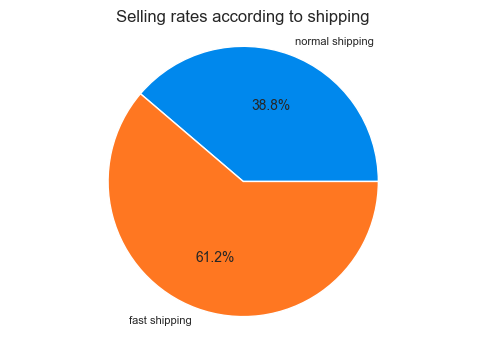

In [861]:
my_data = [fast_shipping['units_sold'].mean(), normal_shipping['units_sold'].mean()]
my_labels = 'normal shipping','fast shipping'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Selling rates according to shipping')
plt.axis('equal')
plt.show()

Les produits avec l'option d'expédition rapide sont vendus deux fois plus que les produits avec l'expédition standard. Selon une recherche sur un site de commerce électronique populaire, 98 % des consommateurs préfèrent les produits avec des options d'expédition rapide. Ces résultats sont cohérents avec nos constatations.

*badges_count*

In [862]:
df_badge = df.copy()
df_badge['badges_count'] = df_badge['badges_count'].replace(0, 'No Badge')
df_badge['badges_count'] = df_badge['badges_count'].replace(1, 'Have Badge')
df_badge['badges_count'] = df_badge['badges_count'].replace(2, 'Have Badge')
df_badge['badges_count'] = df_badge['badges_count'].replace(3, 'Have Badge')

[Text(0.5, 0, 'Amount Badge'), Text(0, 0.5, 'Unit Sold')]

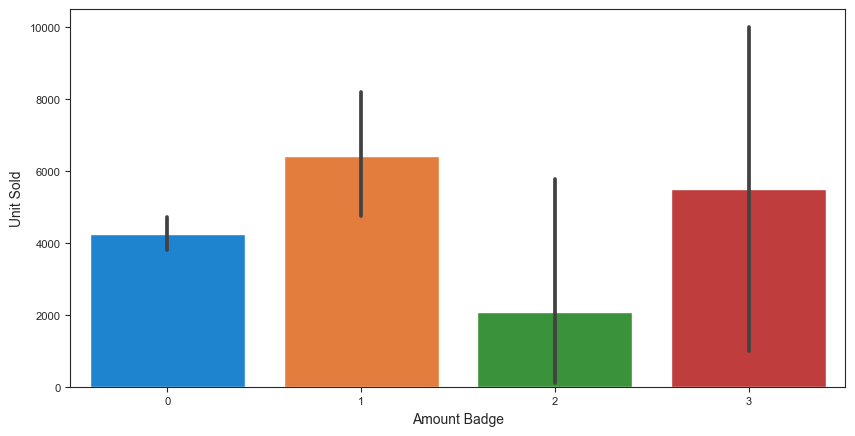

In [863]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'badges_count', y = 'units_sold', data = df, ax = ax)
ax.set(xlabel='Amount Badge', ylabel='Unit Sold')

[Text(0.5, 0, 'Amount Badge'), Text(0, 0.5, 'Unit Sold')]

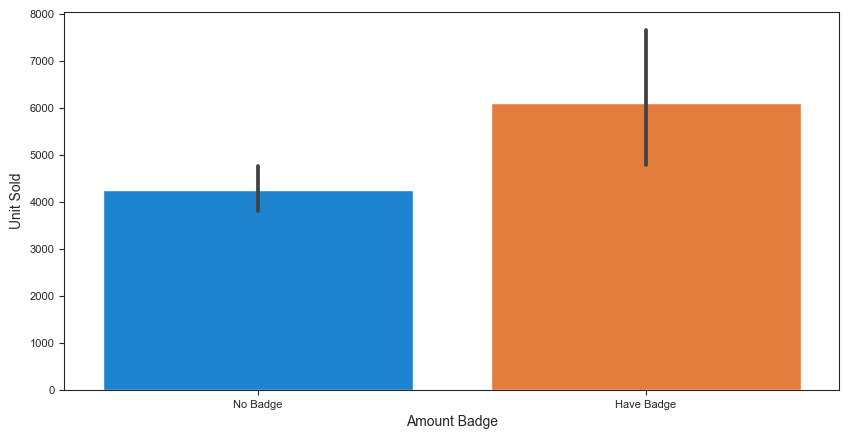

In [864]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'badges_count', y = 'units_sold', data = df_badge, ax = ax)
ax.set(xlabel='Amount Badge', ylabel='Unit Sold')

***<h3>4. rating</h3>***

In [865]:
df_rating = df.copy()
df_rating = df_rating.astype({'rating':'int','merchant_rating':'int'}) 

[Text(0.5, 0, 'rating'), Text(0, 0.5, 'Unit Sold')]

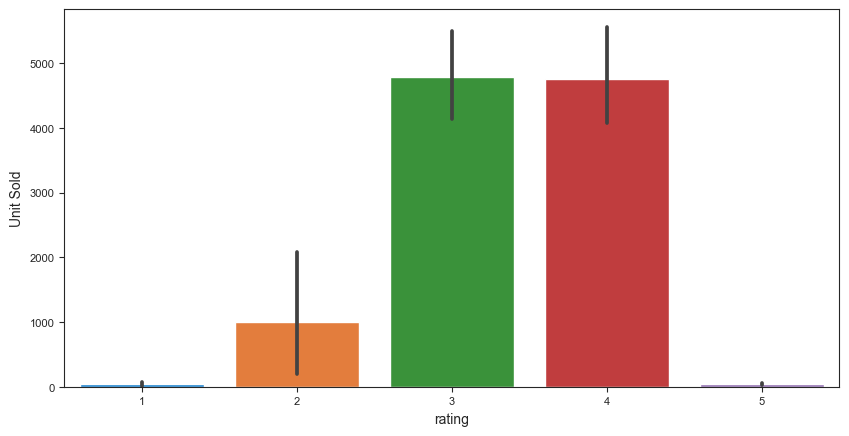

In [866]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'rating', y = 'units_sold', data = df_rating, ax = ax)
ax.set(xlabel='rating', ylabel='Unit Sold')

[Text(0.5, 0, 'rating'), Text(0, 0.5, 'Price')]

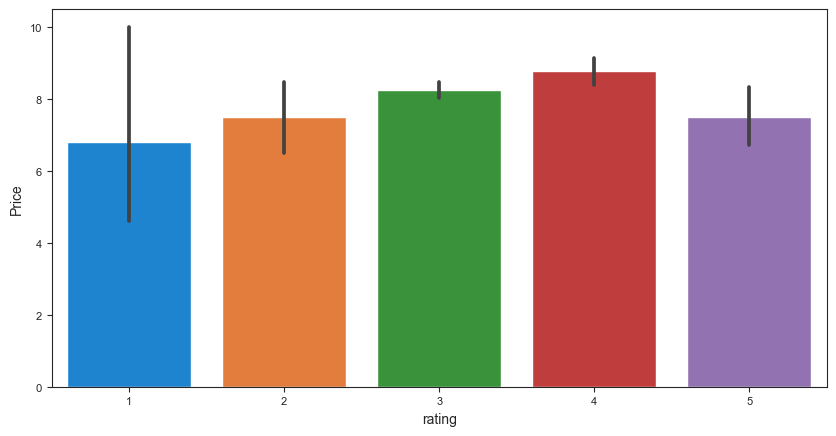

In [867]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'rating', y = 'price', data = df_rating, ax = ax)
ax.set(xlabel='rating', ylabel='Price')

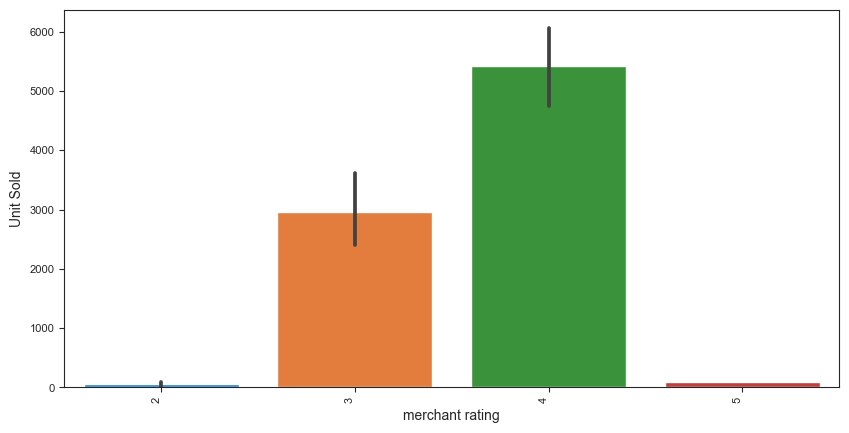

In [868]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = ('merchant_rating'), y = 'units_sold', data = df_rating, ax = ax)
ax.set(xlabel='merchant rating', ylabel='Unit Sold')

plt.xticks(rotation=90, ha='right')
plt.show()

De la visualisation des données ci-dessus montre :

1. À partir des données de rating et de merchant rating, il ressort qu'une évaluation de >3  soutient les ventes, ce qui indique que l'évaluation a un effet sur les ventes
2. Les ventes avec des badges plus élevés ont des ventes plus élevées

In [869]:
from sklearn.cluster import KMeans


Text(0, 0.5, 'kmeans inertia')

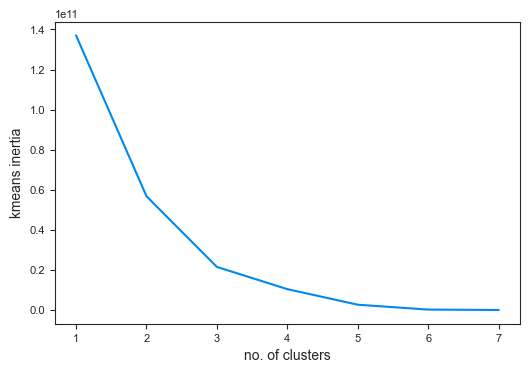

In [870]:
clusters = {}
for i in range(1,8):
    kmeans = KMeans(n_clusters=i).fit(df[['units_sold']])
    clusters[i] = kmeans.inertia_
    
plt.plot(list(clusters.keys()), list(clusters.values()))
plt.xlabel('no. of clusters')
plt.ylabel('kmeans inertia')

In [871]:
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [872]:
df['units_sold_cluster'] = KMeans(n_clusters=3).fit(df[['units_sold']]).predict(df[['units_sold']])
df = order_cluster('units_sold_cluster','units_sold',df,True)
df.groupby(['units_sold_cluster'])['units_sold'].describe()


,count,mean,std,min,25%,50%,75%,max
units_sold_cluster,,,,,,,,
0,1237.0,1241.873080,1776.405742,1.0,100.0,1000.0,1000.0,5000.0
1,279.0,13691.756272,4834.487556,10000.0,10000.0,10000.0,20000.0,20000.0
2,23.0,63043.478261,22448.887927,50000.0,50000.0,50000.0,75000.0,100000.0


In [873]:
px.scatter(df,x='units_sold',y='rating', color='units_sold_cluster', marginal_y ='box',title='Rating vs units sold')

* La médiane pour rating est de 3,85 et les produits du groupe le plus vendu ont une note comprise entre 3,35 et 4,1 semble très raisonnable
* La notation est très importante pour déterminer le potentiel du produit
* Il y a encore des produits avec 5 étoiles mais incapables de franchir la ligne des 100-1000 unités vendues
* il existe des produits très peu performants avec une note inférieure à 3

In [874]:
def make_clusters(df,column):
    clusters = {}
    for i in range(1,8):
        kmeans = KMeans(n_clusters=i).fit(df[[column]])
        clusters[i] = kmeans.inertia_

    plt.plot(list(clusters.keys()), list(clusters.values()));
    plt.title(f'{column} clusters')
    plt.xlabel('no. of clusters')
    plt.ylabel('kmeans inertia')

Text(0.5, 1.0, 'Distribution of Rating Score')

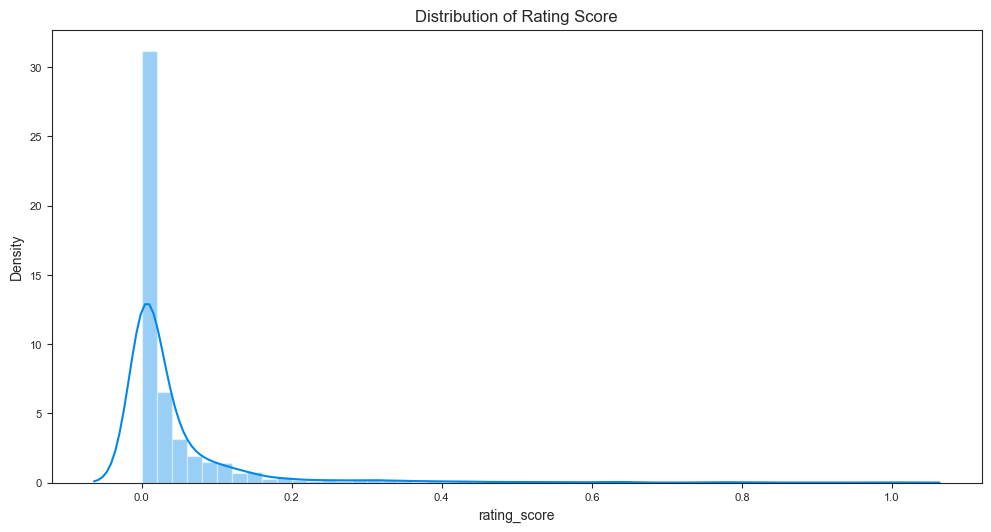

In [875]:
df['rating_score'] = df['rating']*df['rating_count']
df['rating_score'] =df['rating_score']/df['rating_score'].max()
plt.figure(figsize=(12,6))
sns.distplot(df['rating_score'])
plt.title('Distribution of Rating Score')

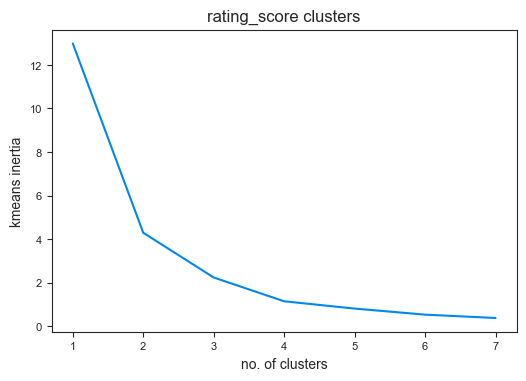

In [876]:
make_clusters(df,'rating_score')

In [877]:
kmeans = KMeans(n_clusters=3).fit(df[['rating_score']])
df['rating_score_cluster'] = kmeans.predict(df[['rating_score']])
df= order_cluster(df=df,cluster_field_name='rating_score_cluster',target_field_name='rating_score',ascending=True)
df.groupby('rating_score_cluster')[['rating','rating_count','units_sold']].describe().T

rating_score_cluster             0             1              2
rating       count     1291.000000    204.000000      44.000000
             mean         3.802912      3.931716       3.902727
             std          0.539936      0.282338       0.236332
             min          1.000000      2.930000       3.350000
             25%          3.500000      3.735000       3.760000
             50%          3.820000      3.960000       3.930000
             75%          4.100000      4.150000       4.050000
             max          5.000000      4.470000       4.480000
rating_count count     1291.000000    204.000000      44.000000
             mean       284.993803   2833.828431   10236.772727
             std        381.799901   1180.453968    3750.479596
             min          0.000000   1512.000000    5882.000000
             25%         19.000000   2006.000000    7590.750000
             50%         87.000000   2509.000000    8965.500000
             75%        458.000000   3219.250000   11945.000000
             max       1786.000000   7088.000000   20744.000000
units_sold   count     1291.000000    204.000000      44.000000
             mean      1693.413633  13627.450980   41818.181818
             std       2728.825308   5920.527151   27217.703479
             min          1.000000   5000.000000   20000.000000
             25%        100.000000  10000.000000   20000.000000
             50%       1000.000000  10000.000000   35000.000000
             75%       1000.000000  20000.000000   50000.000000
             max      20000.000000  50000.000000  100000.000000

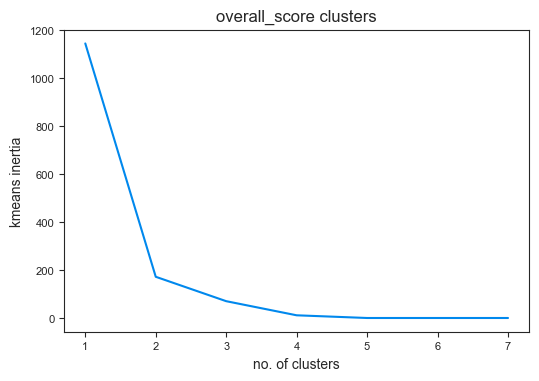

In [878]:
df['overall_score'] = df['rating_score_cluster'] + df['units_sold_cluster']
make_clusters(df,'overall_score')

In [879]:
kmeans= KMeans(n_clusters=2).fit(df[['overall_score']])
df['overall_score_cluster'] = kmeans.predict(df[['overall_score']])
df = order_cluster(df=df,target_field_name='overall_score', cluster_field_name='overall_score_cluster', ascending=True)
df.groupby('overall_score_cluster')[['rating_score','price','units_sold']].describe().T

overall_score_cluster             0              1
rating_score count      1307.000000     232.000000
             mean          0.013634       0.197995
             std           0.018811       0.158763
             min           0.000000       0.072588
             25%           0.000782       0.100364
             50%           0.003905       0.134758
             75%           0.021824       0.240655
             max           0.133229       1.000000
price        count      1307.000000     232.000000
             mean          8.333091       8.488060
             std           4.058687       3.170827
             min           1.000000       2.000000
             25%           5.780000       6.000000
             50%           8.000000       8.000000
             75%          11.000000      11.000000
             max          49.000000      19.000000
units_sold   count      1307.000000     232.000000
             mean       1733.892119   19568.965517
             std        2736.342060   16717.269054
             min           1.000000   10000.000000
             25%         100.000000   10000.000000
             50%        1000.000000   20000.000000
             75%        1000.000000   20000.000000
             max       20000.000000  100000.000000

* Avec ce score global, nous avons identifié les groupes de produits les plus vendus et les plus appréciés qui sont ceux qui génèrent des revenus élevés et les produits dont les performances sont inférieures à la moyenne
* Il y a 213 produits à succès avec une gamme d'unités vendues de 10K à 100K au prix moyen de 8,45
* Dans l'autre groupe, le prix moyen est de 8,34 mais le nombre moyen d'unités vendues est beaucoup plus bas
* Une autre chose à noter est que les gens préfèrent un prix raisonnable car dans un cluster réussi, le prix maximum est de 19, les produits de ce cluster doivent valoir le prix.

price & retaile price analyse des residues

In [880]:
px.scatter(df,x='retail_price', y='price',color='units_sold_cluster',marginal_y='box')

La plupart des produits les plus vendus semblent être concentrés à gauche où la différence de prix est très importante

***<h3>5. product_variation_size_id</h3>***

In [881]:
df['product_variation_size_id'].isna().sum()

0

In [882]:
size = df['product_variation_size_id'].value_counts()
size[size > 1]

S               630
XS              344
M               198
XXS              94
L                49
XL               17
S.               16
XXL              15
no_size          14
XXXS              6
Size S            5
XS.               5
s                 5
4XL               5
SIZE XS           4
2XL               4
Size-XS           4
M.                4
Size-S            3
33                3
34                3
SizeL             3
2pcs              3
10 ml             3
1 pc.             2
One Size          2
Size4XL           2
S Pink            2
XXXXXL            2
Size -XXS         2
S(bust 88cm)      2
SIZE-XXS          2
size S            2
XXXXL             2
Size S.           2
35                2
Suit-S            2
3XL               2
5XL               2
Size M            2
EU 35             2
29                2
1                 2
Name: product_variation_size_id, dtype: int64

In [883]:
size[size == 1].value_counts()

1    64
Name: product_variation_size_id, dtype: int64

In [884]:
# XXS
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size -XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE-XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('33', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('29', 'XXS')

# XS
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XS.', 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XS', 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE XS', 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('34', 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('35', 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('EU 35', 'XS')


# S
df['product_variation_size_id'] = df['product_variation_size_id'].replace('S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('s', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size/S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size--S ', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('S(bust 88cm)', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('S Pink', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Suit-S', 'S')

# M
df['product_variation_size_id'] = df['product_variation_size_id'].replace('M.', 'M')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size M', 'M')

# L
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SizeL', 'L')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('L.', 'L')

# XXL
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2XL', 'XXL')

# Plus size
df['product_variation_size_id'] = df['product_variation_size_id'].replace('4XL', '3XL+')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('3XL', '3XL+')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size4XL', '3XL+')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('5XL', '3XL+')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXXXL', '3XL+')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-5XL', '3XL+')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXXL', '3XL+')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE-4XL', '3XL+')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('6XL', '3XL+')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXL', '3XL+')

#no_size_cat
df['product_variation_size_id'] = df['product_variation_size_id'].replace('10 ml', 'no_size_cat')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2pcs', 'no_size_cat')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('1 pc.', 'no_size_cat')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('1', 'no_size_cat')



In [885]:
size = df['product_variation_size_id'].value_counts()
size[size > 1]

S              671
XS             364
M              204
XXS            110
L               53
3XL+            19
XXL             19
XL              17
no_size         14
no_size_cat     10
One Size         2
Name: product_variation_size_id, dtype: int64

In [886]:
def pr_size(name):
    if name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'no_size' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'no_size_cat' \
    or name == 'One Size' \
    or name == '3XL+':
        return name
    else:
        return "OTHER"
    

df['product_variation_size_id'] = df['product_variation_size_id'].apply(pr_size)
size = df['product_variation_size_id'].value_counts()
size


S              671
XS             364
M              204
XXS            110
OTHER           56
L               53
XXL             19
3XL+            19
XL              17
no_size         14
no_size_cat     10
One Size         2
Name: product_variation_size_id, dtype: int64

<AxesSubplot:xlabel='product_variation_size_id', ylabel='count'>

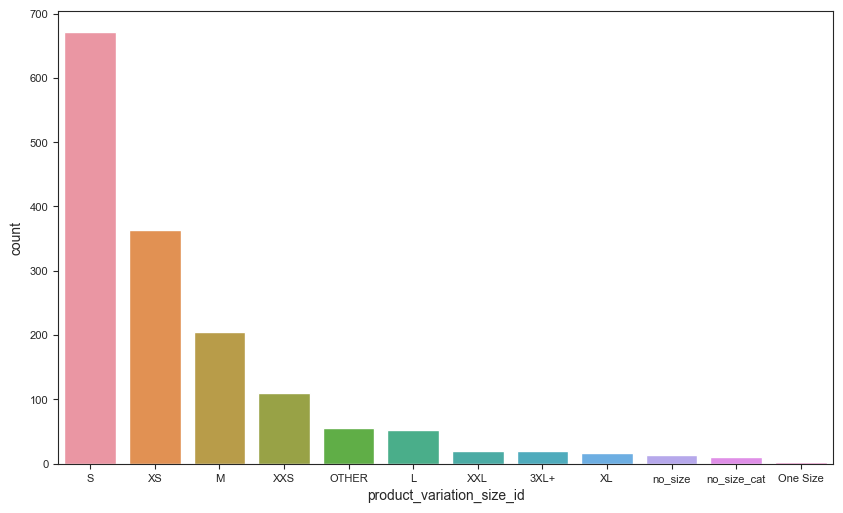

In [887]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='product_variation_size_id',order=df['product_variation_size_id'].value_counts().index)

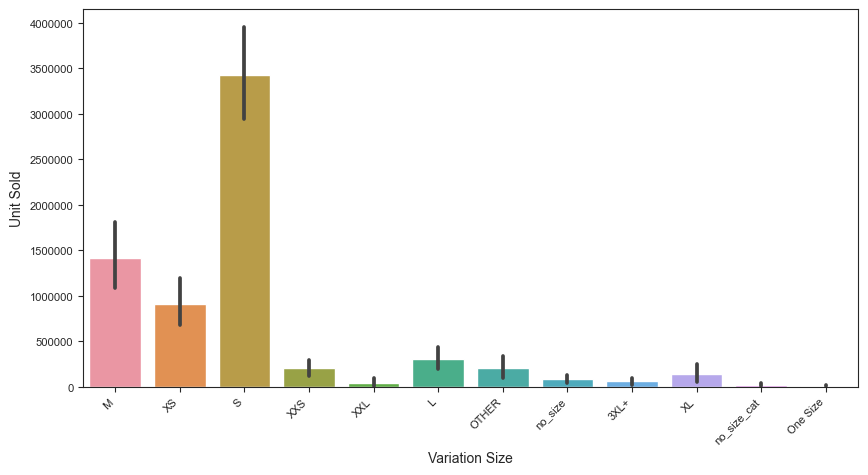

In [888]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'product_variation_size_id', y = 'units_sold',estimator = sum, data = df, ax = ax)
ax.set(xlabel='Variation Size', ylabel='Unit Sold')

plt.xticks(rotation=45, ha='right')
plt.show()

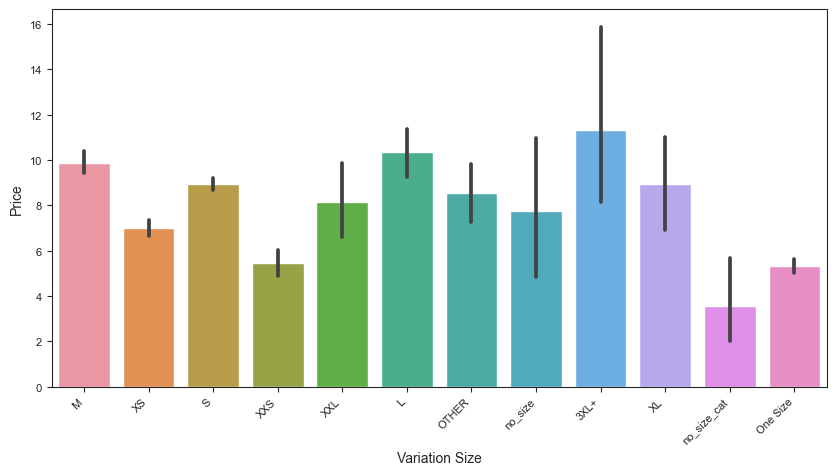

In [889]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'product_variation_size_id', y = 'price', data = df, ax = ax)
ax.set(xlabel='Variation Size', ylabel='Price')

plt.xticks(rotation=45, ha='right')
plt.show()

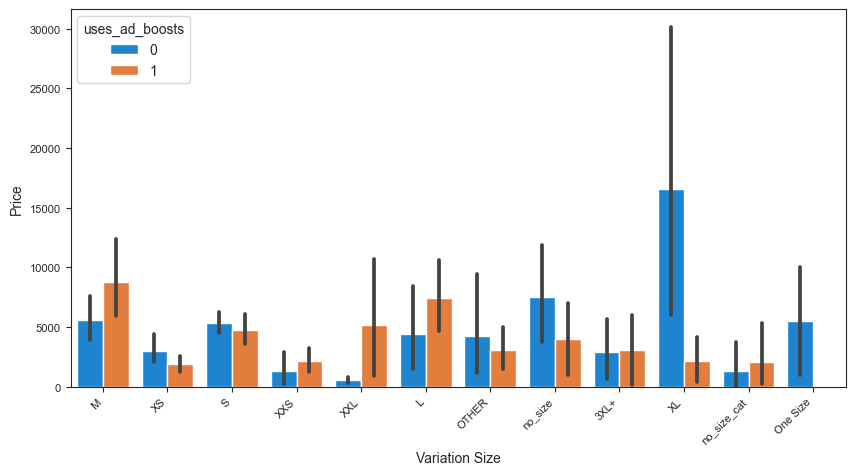

In [890]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'product_variation_size_id', y = 'units_sold', data = df, ax = ax, hue= 'uses_ad_boosts')
ax.set(xlabel='Variation Size', ylabel='Price')

plt.xticks(rotation=45, ha='right')
plt.show()

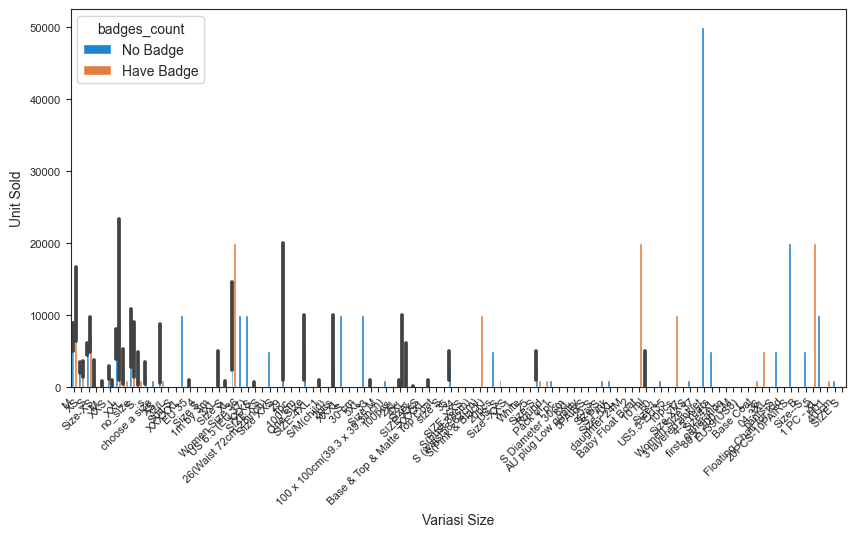

In [891]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'product_variation_size_id', y = 'units_sold', data = df_badge, ax = ax, hue= 'badges_count')
ax.set(xlabel='Variasi Size', ylabel='Unit Sold')

plt.xticks(rotation=45, ha='right')
plt.show()

À partir de la visualisation des données des variations de taille :

1. La taille du produit est petite de S à M, et ça représente les ventes les plus élevées par rapport à la grande taille L et au-dessus
2. Pour le prix, il n'y a pas de différence significative entre les tailles, seule la taille 3XL+ a le prix le plus élevé
3. Le recours à la publicité a encore peu d'effet sur les ventes, sauf XL

***<h3>6. product_color</h3>***

In [892]:
pr_color = df['product_color'].value_counts()
pr_color[pr_color > 2]

black               298
white               246
yellow              101
pink                 97
blue                 96
red                  92
green                86
grey                 70
purple               53
no_color             41
armygreen            31
orange               27
winered              27
navyblue             27
multicolor           20
beige                14
lightblue            12
khaki                12
gray                 10
white & green        10
rosered               8
skyblue               8
brown                 7
darkblue              6
coffee                6
rose                  5
floral                5
black & green         4
lightpink             4
leopard               4
lightgreen            3
Black                 3
camouflage            3
orange-red            3
navy                  3
White                 3
fluorescentgreen      3
black & white         3
Name: product_color, dtype: int64

In [893]:
pr_color[pr_color == 2]

lakeblue          2
camel             2
dustypink         2
pink & blue       2
applegreen        2
watermelonred     2
wine              2
black & yellow    2
black & blue      2
burgundy          2
navy blue         2
Pink              2
lightred          2
mintgreen         2
pink & grey       2
pink & black      2
white & black     2
silver            2
lightyellow       2
Army green        2
coolblack         2
apricot           2
pink & white      2
whitefloral       2
Name: product_color, dtype: int64

In [894]:
pr_color[pr_color == 1]

whitestripe            1
light green            1
offblack               1
violet                 1
rosegold               1
blackwhite             1
darkgreen              1
gold                   1
orange & camouflage    1
ivory                  1
RED                    1
blue & pink            1
lightkhaki             1
Blue                   1
denimblue              1
star                   1
red & blue             1
army green             1
leopardprint           1
prussianblue           1
jasper                 1
white & red            1
coralred               1
tan                    1
claret                 1
nude                   1
lightpurple            1
army                   1
black & stripe         1
Rose red               1
greysnakeskinprint     1
offwhite               1
lightgray              1
gray & white           1
brown & yellow         1
winered & yellow       1
rainbow                1
lightgrey              1
navyblue & white       1
wine red               1


In [895]:
df['product_color'] = df['product_color'].replace('White', 'white')
df['product_color'] = df['product_color'].replace('offwhite', 'white')
df['product_color'] = df['product_color'].replace('Black', 'black')
df['product_color'] = df['product_color'].replace('coolblack', 'black')
df['product_color'] = df['product_color'].replace('offblack', 'black')

df['product_color'] = df['product_color'].replace('navyblue', 'blue')
df['product_color'] = df['product_color'].replace('lightblue', 'blue')
df['product_color'] = df['product_color'].replace('skyblue', 'blue')
df['product_color'] = df['product_color'].replace('darkblue', 'blue')
df['product_color'] = df['product_color'].replace('navy', 'blue')
df['product_color'] = df['product_color'].replace('lakeblue', 'blue')
df['product_color'] = df['product_color'].replace('purple', 'blue')
df['product_color'] = df['product_color'].replace('navy blue', 'blue')
df['product_color'] = df['product_color'].replace('prussianblue', 'blue')
df['product_color'] = df['product_color'].replace('Blue', 'blue')
df['product_color'] = df['product_color'].replace('denimblue', 'blue')

df['product_color'] = df['product_color'].replace('winered', 'red')
df['product_color'] = df['product_color'].replace('rosered', 'red')
df['product_color'] = df['product_color'].replace('rose', 'red')
df['product_color'] = df['product_color'].replace('orange-red', 'red')
df['product_color'] = df['product_color'].replace('burgundy', 'red')
df['product_color'] = df['product_color'].replace('lightred', 'red')
df['product_color'] = df['product_color'].replace('coralred', 'red')
df['product_color'] = df['product_color'].replace('wine', 'red')
df['product_color'] = df['product_color'].replace('watermelonred', 'red')
df['product_color'] = df['product_color'].replace('Rose red', 'red')
df['product_color'] = df['product_color'].replace('RED', 'red')
df['product_color'] = df['product_color'].replace('wine red', 'red')

df['product_color'] = df['product_color'].replace('lightpink', 'pink')
df['product_color'] = df['product_color'].replace('beige', 'pink')
df['product_color'] = df['product_color'].replace('camel', 'pink')
df['product_color'] = df['product_color'].replace('apricot', 'pink')
df['product_color'] = df['product_color'].replace('Pink', 'pink')
df['product_color'] = df['product_color'].replace('dustypink', 'pink')

df['product_color'] = df['product_color'].replace('armygreen', 'green')
df['product_color'] = df['product_color'].replace('army green', 'green')
df['product_color'] = df['product_color'].replace('Army green', 'green')
df['product_color'] = df['product_color'].replace('lightgreen', 'green')
df['product_color'] = df['product_color'].replace('fluorescentgreen', 'green')
df['product_color'] = df['product_color'].replace('mintgreen', 'green')
df['product_color'] = df['product_color'].replace('khaki', 'green')
df['product_color'] = df['product_color'].replace('applegreen', 'green')
df['product_color'] = df['product_color'].replace('army', 'green')
df['product_color'] = df['product_color'].replace('darkgreen', 'green')
df['product_color'] = df['product_color'].replace('light green', 'green')

df['product_color'] = df['product_color'].replace('gray', 'grey')
df['product_color'] = df['product_color'].replace('silver', 'grey')
df['product_color'] = df['product_color'].replace('lightgray', 'grey')
df['product_color'] = df['product_color'].replace('lightgrey', 'grey')

df['product_color'] = df['product_color'].replace('lightyellow', 'yellow')

df['product_color'] = df['product_color'].replace('coffee', 'brown')
df['product_color'] = df['product_color'].replace('lightkhaki', 'brown')

df['product_color'] = df['product_color'].replace('rosegold', 'gold')

df['product_color'] = df['product_color'].replace('lightpurple', 'purple')

df['product_color'] = df['product_color'].replace('white & green', 'dual')
df['product_color'] = df['product_color'].replace('black & green', 'dual')
df['product_color'] = df['product_color'].replace('black & white', 'dual')
df['product_color'] = df['product_color'].replace('pink & grey', 'dual')
df['product_color'] = df['product_color'].replace('pink & white', 'dual')
df['product_color'] = df['product_color'].replace('black & blue', 'dual')
df['product_color'] = df['product_color'].replace('white & black', 'dual')
df['product_color'] = df['product_color'].replace('black & yellow', 'dual')
df['product_color'] = df['product_color'].replace('pink & blue', 'dual')
df['product_color'] = df['product_color'].replace('pink & black', 'dual')
df['product_color'] = df['product_color'].replace('blackwhite', 'dual')
df['product_color'] = df['product_color'].replace('black & stripe', 'dual')
df['product_color'] = df['product_color'].replace('white & red', 'dual')
df['product_color'] = df['product_color'].replace('navyblue & white', 'dual')
df['product_color'] = df['product_color'].replace('winered & yellow', 'dual')
df['product_color'] = df['product_color'].replace('gray & white', 'dual')
df['product_color'] = df['product_color'].replace('brown & yellow', 'dual')
df['product_color'] = df['product_color'].replace('orange & camouflage', 'dual')
df['product_color'] = df['product_color'].replace('blue & pink', 'dual')
df['product_color'] = df['product_color'].replace('red & blue','dual')

df['product_color'] = df['product_color'].replace('multicolor', 'other')
df['product_color'] = df['product_color'].replace('floral', 'other')
df['product_color'] = df['product_color'].replace('whitefloral', 'other')
df['product_color'] = df['product_color'].replace('leopard', 'other')
df['product_color'] = df['product_color'].replace('camouflage', 'other')
df['product_color'] = df['product_color'].replace('rainbow', 'other')
df['product_color'] = df['product_color'].replace('star', 'other')
df['product_color'] = df['product_color'].replace('leopardprint', 'other')
df['product_color'] = df['product_color'].replace('violet', 'other')
df['product_color'] = df['product_color'].replace('greysnakeskinprint', 'other')
df['product_color'] = df['product_color'].replace('jasper', 'other')
df['product_color'] = df['product_color'].replace('tan', 'other')
df['product_color'] = df['product_color'].replace('claret', 'other')
df['product_color'] = df['product_color'].replace('ivory', 'other')
df['product_color'] = df['product_color'].replace('whitestripe', 'other')

In [896]:
df['product_color'].value_counts().to_frame()

,product_color
black,304
white,250
blue,212
red,147
green,145
pink,123
yellow,103
grey,84
other,44
no_color,41


<AxesSubplot:xlabel='product_color', ylabel='count'>

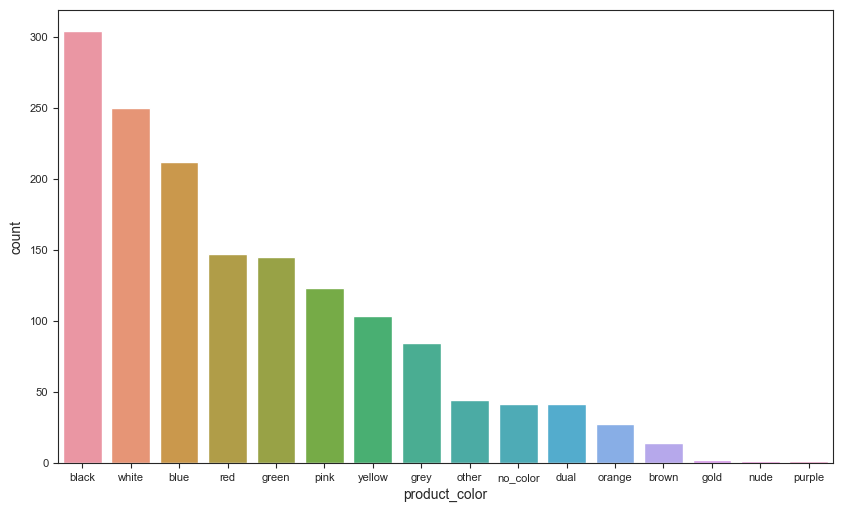

In [897]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='product_color',order=df['product_color'].value_counts().index)

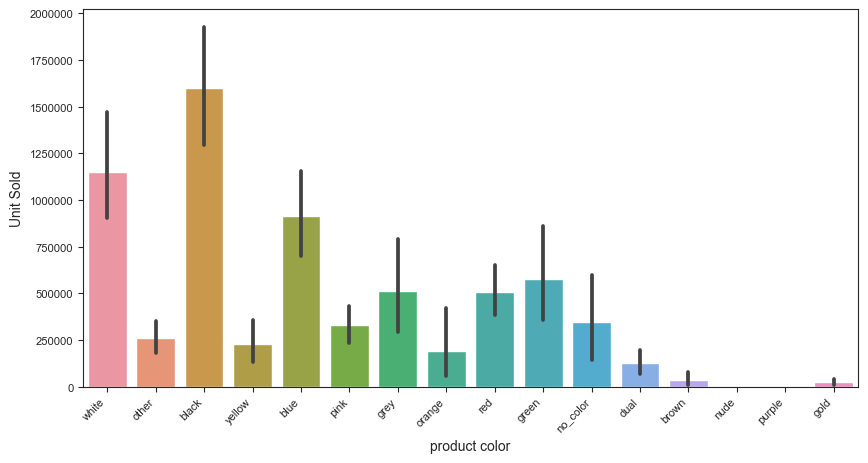

In [898]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'product_color', y = 'units_sold',estimator=sum, data = df, ax = ax)
ax.set(xlabel='product color', ylabel='Unit Sold')

plt.xticks(rotation=45, ha='right')
plt.show()

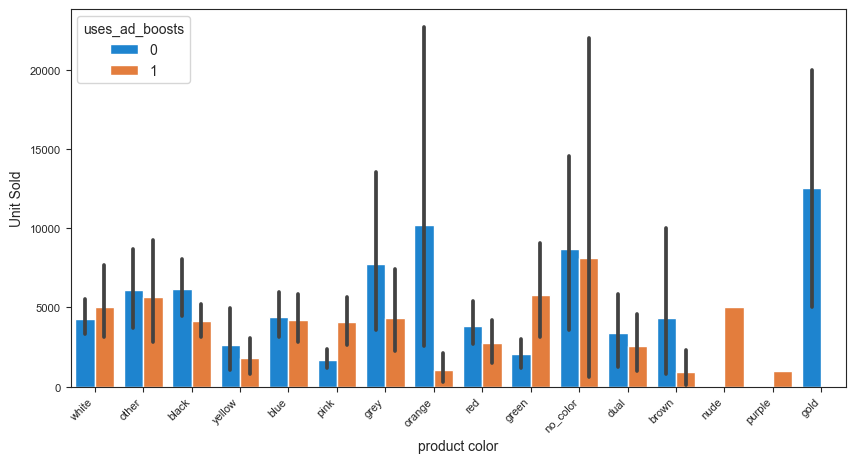

In [899]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'product_color', y = 'units_sold', data = df, ax = ax, hue= 'uses_ad_boosts')
ax.set(xlabel='product color', ylabel='Unit Sold')

plt.xticks(rotation=45, ha='right')
plt.show()

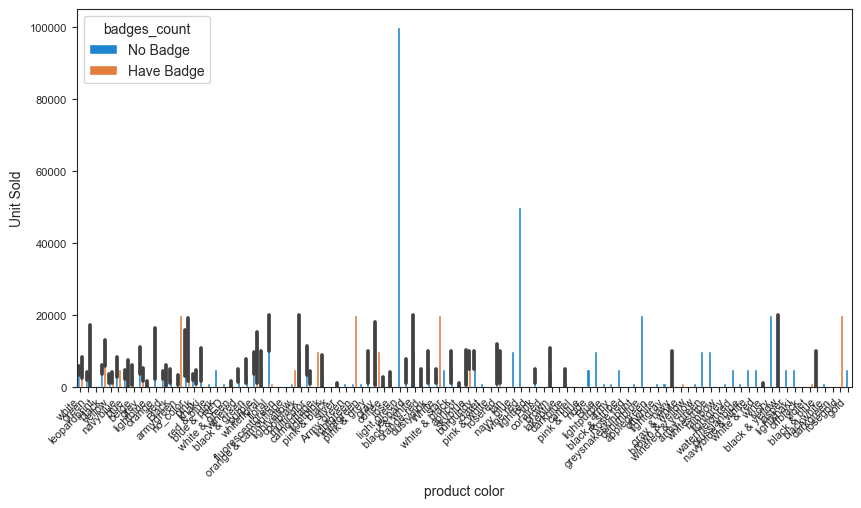

In [900]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'product_color', y = 'units_sold', data = df_badge, ax = ax, hue= 'badges_count')
ax.set(xlabel='product color', ylabel='Unit Sold')

plt.xticks(rotation=45, ha='right')
plt.show()

À partir des données de visualisation des variations de couleurs :
1. D'après le visuel, le noir et le blanc sont les variations de couleurs les plus populaires
2. L'utilisation de la publicité sur les ventes de couleurs a peu d'effet sur les unités vendues
3. les marchands qui ont des badges qui affectent les ventes, comme la couleur or

In [901]:
color_sale=df.groupby('product_color')['units_sold'].sum()
color_sale=color_sale.reset_index().sort_values(by='units_sold',ascending=False)
color_sale

,product_color,units_sold
0,black,1599253
14,white,1148709
1,blue,916078
5,green,573985
6,grey,511630
13,red,504600
7,no_color,347372
11,pink,331400
10,other,258850
15,yellow,227912


In [902]:
top_10_color_sale=color_sale.head(10)

In [903]:
import plotly.express as px
fig=px.bar(data_frame=top_10_color_sale,
      x='product_color',
      y='units_sold')
fig.update_layout(title='Top 10 color sales')
fig.show()

***<h3>7. origin_country</h3>***

In [904]:
df['origin_country'].astype('O').value_counts()

CN                   1484
US                     31
no_origin_country      16
VE                      4
SG                      2
AT                      1
GB                      1
Name: origin_country, dtype: int64

<AxesSubplot:xlabel='origin_country', ylabel='count'>

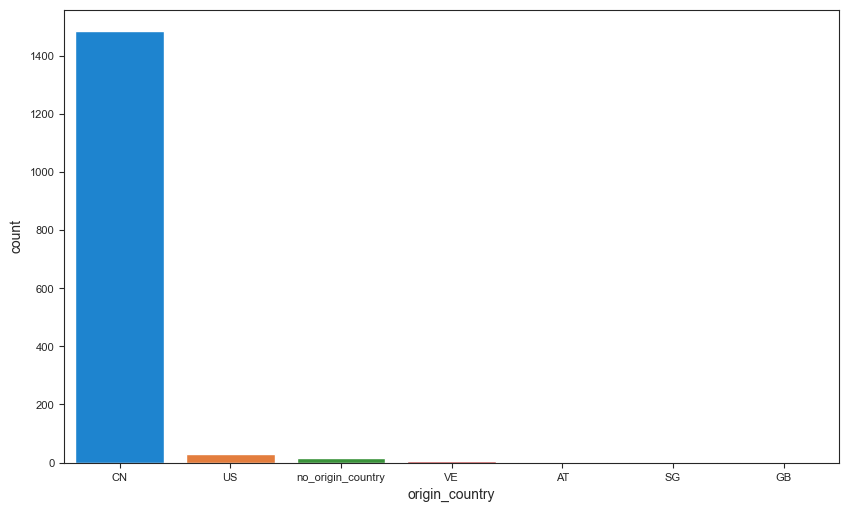

In [905]:
plt.figure(figsize=(10,6))
sns.countplot(x='origin_country',data=df)

[Text(0.5, 0, 'origin country'), Text(0, 0.5, 'Unit Sold')]

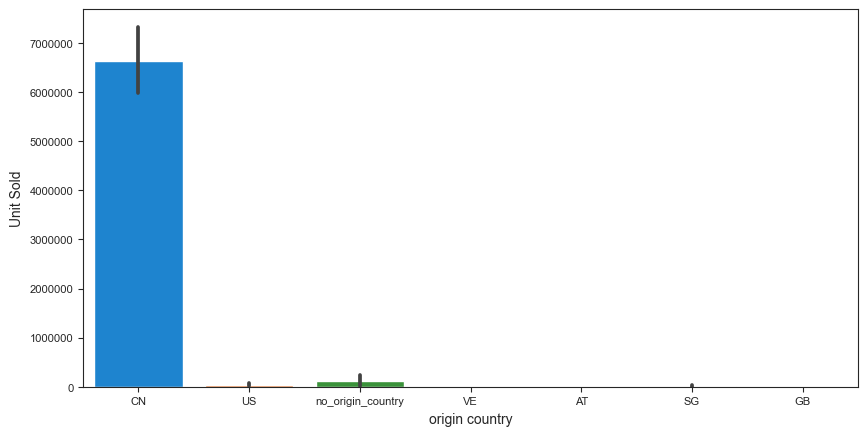

In [906]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'origin_country', y = 'units_sold', data = df,estimator=sum, ax = ax)
ax.set(xlabel='origin country', ylabel='Unit Sold')

La plupart des marchandises ainsi que la plupart des ventes proviennent de Chine  

**<h3>Succes des ventes</h3>**

In [907]:
def is_successful(units_sold):
    if units_sold > 1000:
        return 1
    else:
        return 0

In [908]:
df['is_successful'] = df['units_sold'].apply(is_successful)
print('Percent of successful products: ', df['is_successful'].value_counts()[1] / len(df['is_successful'])*100)

Percent of successful products:  33.6582196231319


In [909]:
badges_column = ['badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping']

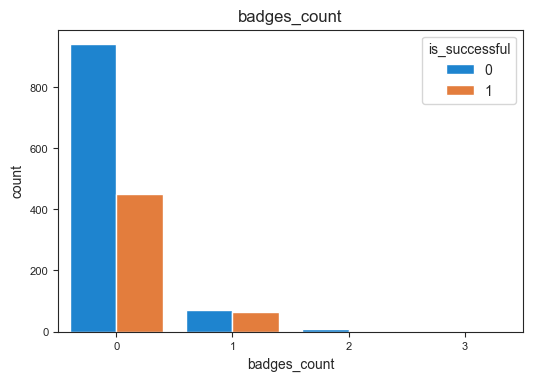

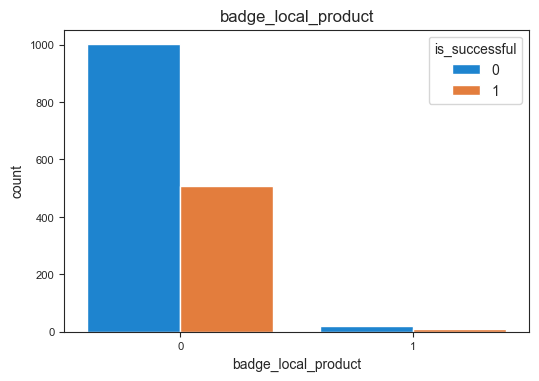

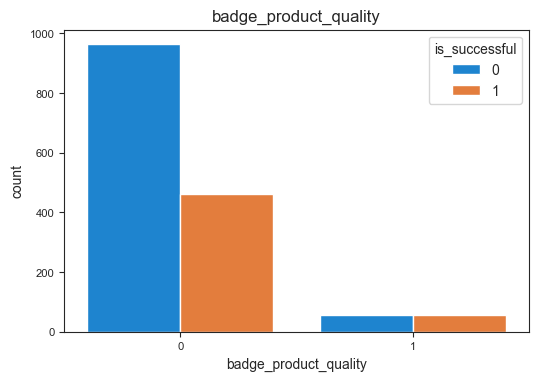

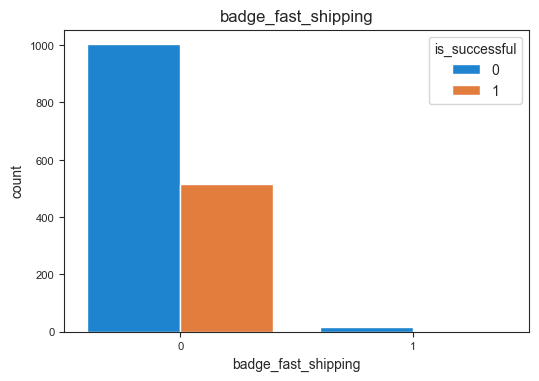

In [910]:
for column in badges_column:
    sns.countplot(data=df, x=column, hue='is_successful')
    plt.title(column)
    plt.show()

 Près de 50% de ceux qui on succes ont des badges, notamment le badge qualité produit.
 
 Donc, supposons que les badges apportent du succes, car il existe de nombreux produits à succès qui n'ont pas non plus de badges.

**Shipping options**

In [911]:
px.scatter(df, x='price', y='shipping_option_price', color= 'units_sold_cluster', title='Shipping price vs Price')

Les gens préfèrent toujours payer moins de frais d'expédition, nous pouvons voir que la plupart des produits vendus ont des frais d'expédition peu élevés

<h2> Feature Selection</h2>

En utilisant des techniques telles que L1 regularization, Drop Feature Selection, Residual Plot Analysis, and Correlations, on peut trouver des caractéristiques importantes qui ont un impact sur la cible "units_sold".

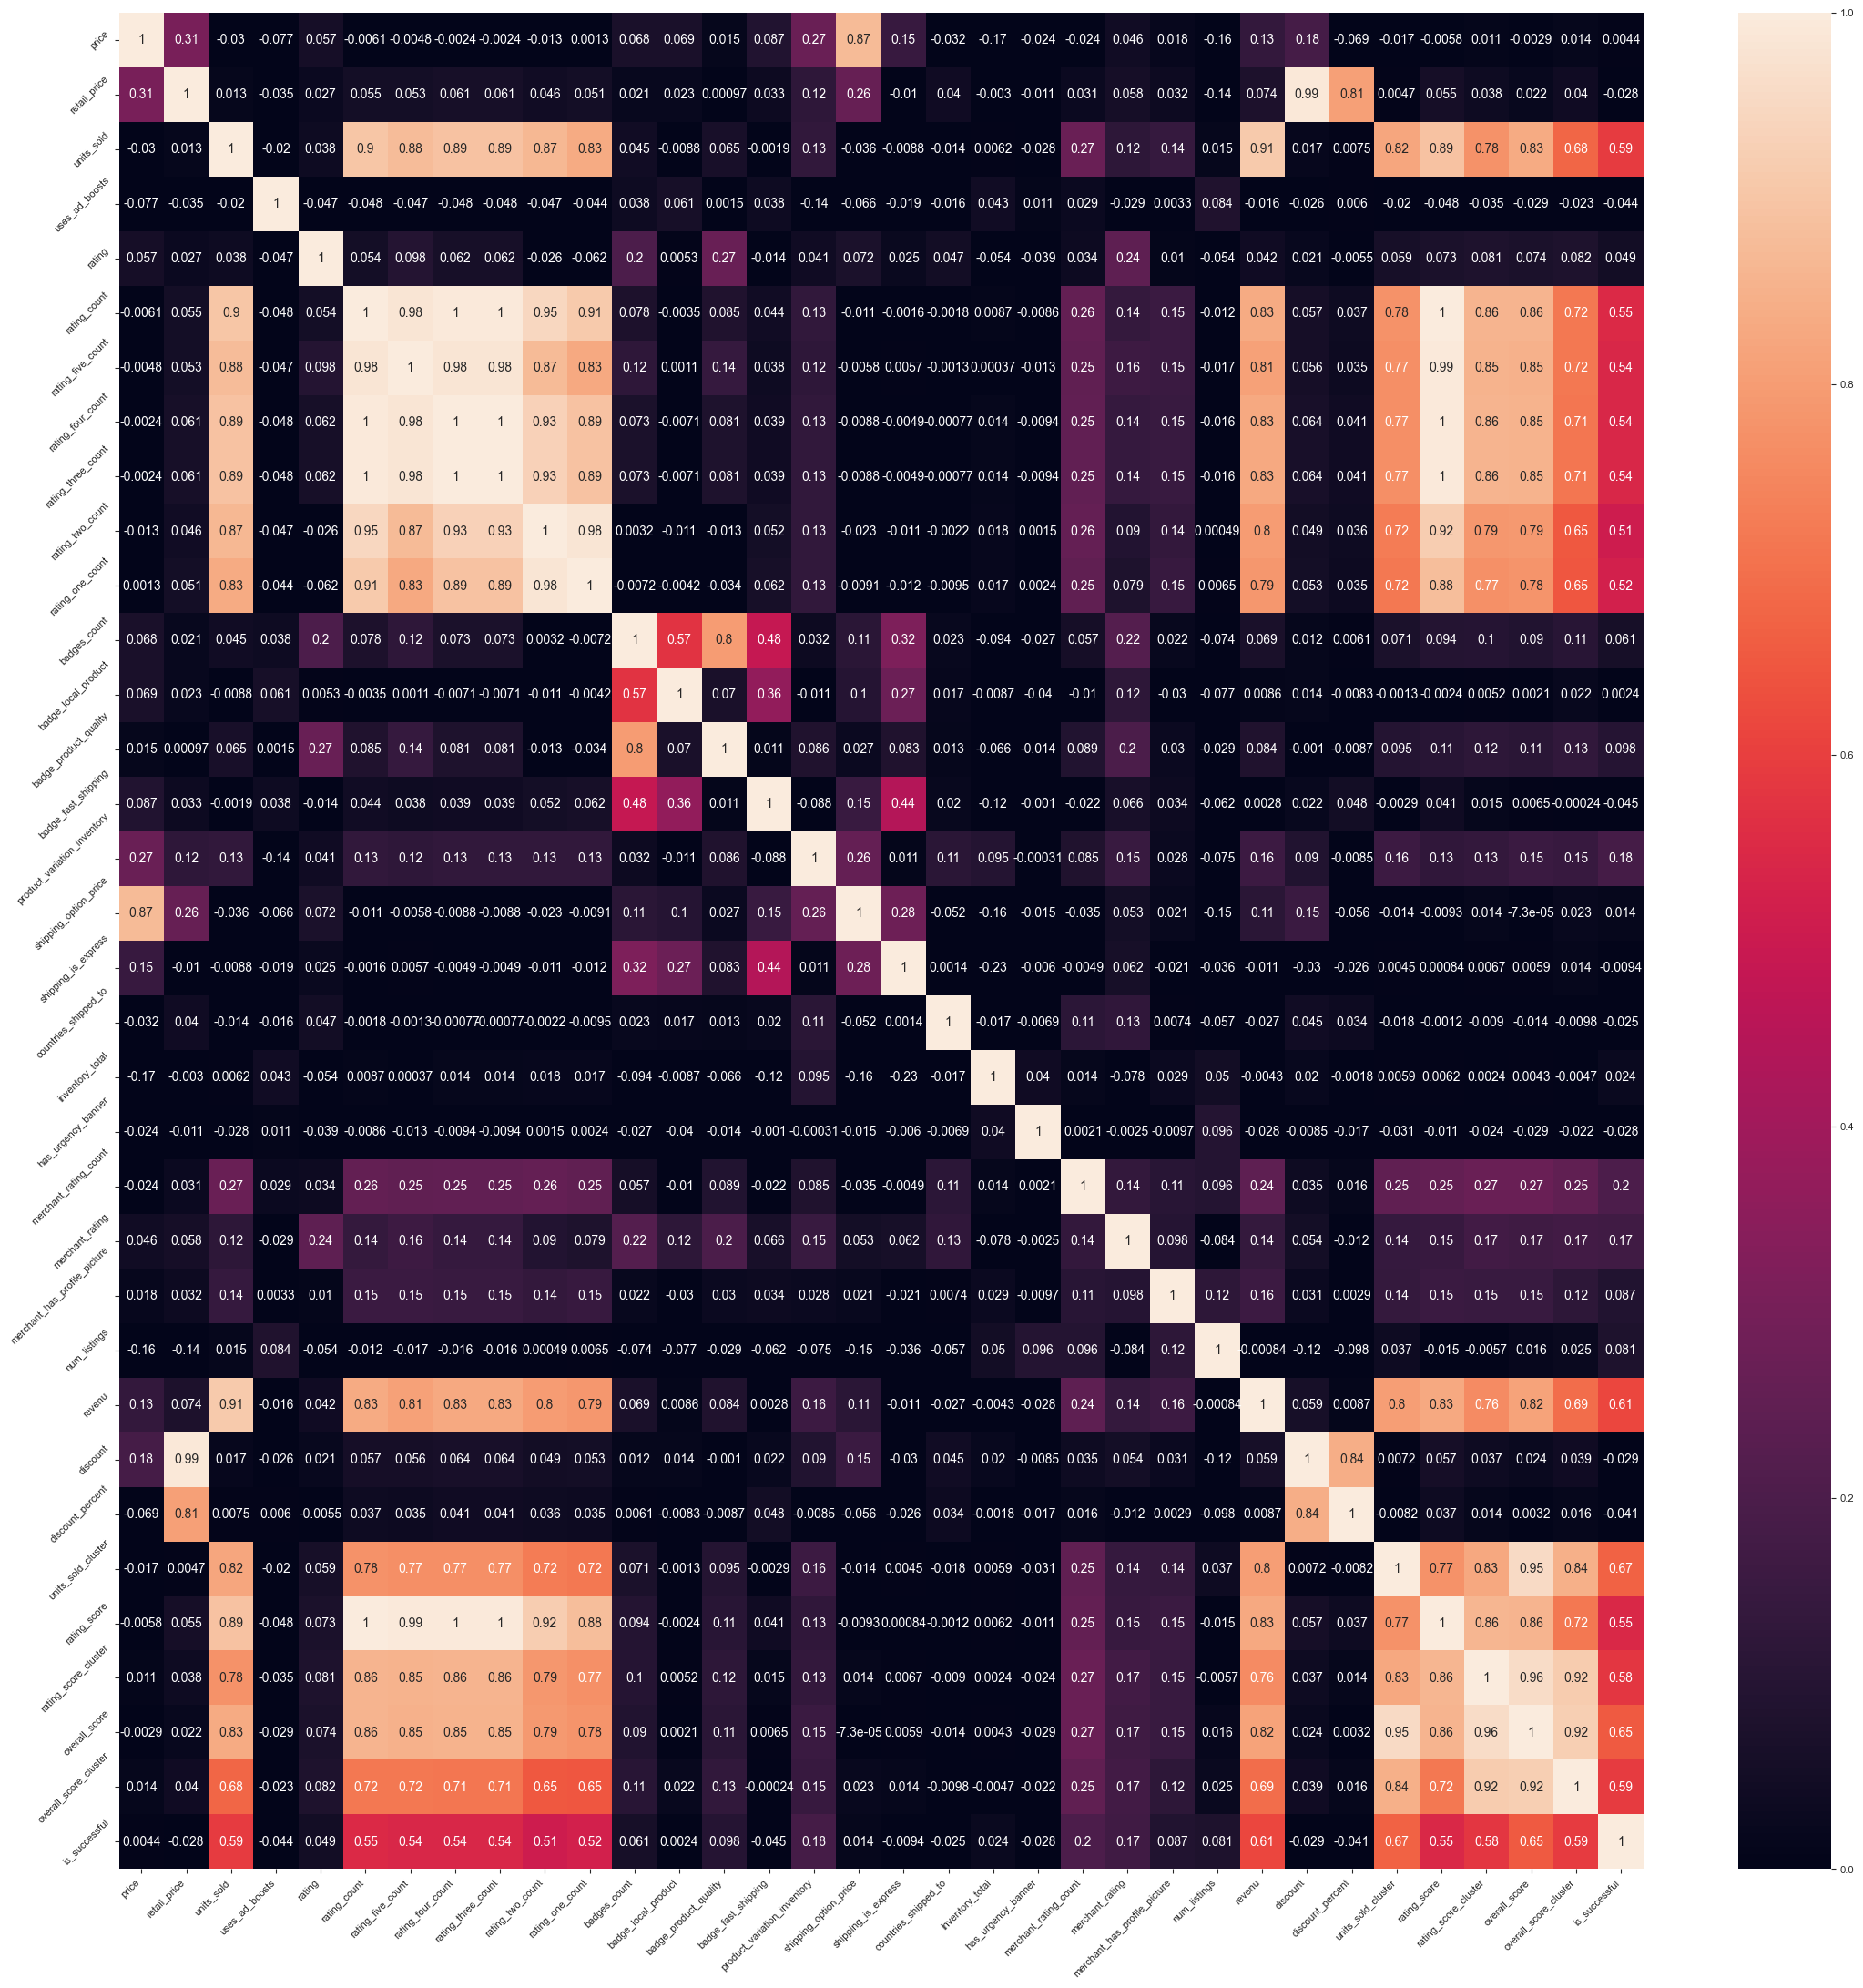

In [912]:
fig,ax=plt.subplots(figsize=(27,27))
fig=sns.heatmap(data=df.corr(),annot=True,cbar=True,vmin=0,vmax=1,ax=ax)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

In [913]:
# les colones categorielles

cat_cols=[x for x in df.columns if df[x].dtype=='O']
cat_cols

['title',
 'prod_gen',
 'title_orig',
 'tags',
 'product_color',
 'product_variation_size_id',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'product_url',
 'product_picture',
 'product_id',
 'tag_list']

In [914]:
# les colones numeriques
num_cols=[x for x in df.columns if df[x].dtype!='O']
num_cols

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture',
 'num_listings',
 'revenu',
 'discount',
 'discount_percent',
 'units_sold_cluster',
 'rating_score',
 'rating_score_cluster',
 'overall_score',
 'overall_score_cluster',
 'is_successful']

In [915]:
df.shape

(1539, 49)

In [916]:
df.head()

,title,prod_gen,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,tag_list,revenu,discount,discount_percent,units_sold_cluster,rating_score,rating_score_cluster,overall_score,overall_score_cluster,is_successful
0,2020 Summer Vintage Flamingo Print Pajamas Se...,Woman,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,...,"['Summer', 'Fashion', 'womenunderwearsuit', 'p...",1600.0,-2.00,0.000000,0,0.002387,0,0,0,0
1,2020 Nouvelle Arrivée Femmes Printemps et Été ...,Woman,2020 New Arrival Women Spring And Summer Beach...,8.00,43,100,0,3.57,14,5.0,...,"['Summer', 'cardigan', 'women beachwear', 'chi...",800.0,35.00,437.500000,0,0.000588,0,0,0,0
2,Hot Summer Cool T-shirt pour les femmes Mode T...,Woman,Hot Summer Cool T Shirt For Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,...,"['Summer', 'Shorts', 'Cotton', 'Cotton T Shirt...",40000.0,0.00,0.000000,0,0.027435,0,0,0,1
3,Femmes Shorts d'été à lacets taille élastique ...,Woman,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,...,"['Summer', 'Plus Size', 'Lace', 'Casual pants'...",272.0,0.28,10.294118,0,0.000729,0,0,0,0
4,Plus la taille d'été femmes décontracté sans m...,Woman,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1,1.0,...,"['Deep V-Neck', 'Summer', 'Plus Size', 'Spaghe...",39.2,5.08,129.591837,0,0.000059,0,0,0,0


In [917]:
df.columns

Index(['title', 'prod_gen', 'title_orig', 'price', 'retail_price',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'origin_country', 'merchant_title',
       'merchant_name', 'merchant_info_subtitle', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
       'product_url', 'product_picture', 'product_id', 'num_listings',
       'tag_list', 'revenu', 'discount', 'discount_percent',
       'units_sold_cluster', 'rating_score', 'rating_score_cluster',
       'overall_score', 'overall_score_cluste

In [918]:
df.shape

(1539, 49)

In [919]:
df.drop(['title', 'prod_gen','title_orig', 'badges_count',
       'tags', 'product_variation_inventory', 'shipping_option_price',
       'countries_shipped_to', 'inventory_total',
      'origin_country', 'merchant_title',
       'merchant_name', 'merchant_info_subtitle', 
       'merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
       'product_url', 'product_picture',  'num_listings',
       'tag_list', 'units_sold_cluster', 'rating_score_cluster',
       'overall_score_cluster'],axis=1,inplace=True)

In [920]:
df.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_color', 'product_variation_size_id', 'shipping_is_express',
       'has_urgency_banner', 'merchant_rating_count', 'product_id', 'revenu',
       'discount', 'discount_percent', 'rating_score', 'overall_score',
       'is_successful'],
      dtype='object')

In [921]:
df.shape

(1539, 26)

In [922]:
df.to_csv('data_ML.csv',index = False)